# **Process Mining y AI Agents basados en LLM y uso de Técnicas RAG para la optimización de procesos hospitalarios.**
## **Chatbot AI Event Log Generator**

**Autor**: Sergio Arias Ruiz  
**Área TFM**: Área 3  
**Fecha**: Mayo 2025  
**Repositorio**: [Github-AI Event Log Generator](https://github.com/sariasruiz/AIeventLogGenerator)  
**Universitat Oberta de Catalunya**


### **Experimento Controlado de evaluación del AI Agent experto en generación de scripts SQL para la extracción de logs de eventos en bases de datos Hospitalarias.**

### **Resultados**

### **1. Resumen Método.**

### **1.1. Sistema propuesto.**

Se desarrolló un **AI Agent** basado en **RAG (Retrieval-Augmented Generation)** que genera *scripts* SQL para extraer logs de eventos a partir del *conocimiento* estructural de la base de datos corporativa. El flujo incluye cuatro componentes principales (Fig. 1):

| Nº | Componente | Configuración |
|----|------------|---------------|
|1|**AI Agent LLM para tareas de Diálogo**|'gpt-4o-mini', *temperature* = 0.0 (determinista). Formula **5 preguntas metodológicas** y **2 técnicas** para generar el contexto de necesidad del usuario.|
|2|**AI Tool 'search_and_generate_sql'**|Accesible por el AI Agent y orquestar la fase RAG y generación de Script SQL.|
|3|**Recuperador semántico**|Búsqueda el conocimiento relevante sobre una base vectorial de embeddings del esquema relacional de la base de datos corporativa.|
|4|**Doble Cadena de razonamiento LLM**|Dos instancias de 'o4-mini', *temperature* = 1.0.<br> • **R1** genera la primera versión del script.<br> • **R2** revisa y depura la salida de R1.|

**Fig. 1.**

El Agente sintetiza un contexto en una variable 'user_need' y llama a la AI Tool.  
La Tool recupera contexto desde una base de datos vectorial, invoca R1 para generar una primera versión del script y luego R2 para tareas de depuración de errores y mejora visual; la versión mejorada del script se envía directamente al usuario sin pasar por el agente.


### **1.2. Resumen Diseño experimental.**

**Prompt controlado para reproducir el dataset de control [MIMICEL v2.1.0](https://physionet.org/content/mimicel-ed/2.1.0/)** lanzado **50 veces**.

El prompt es una descripción extensa en lenguaje natural para reproducir todos los elementos del dataset de control **[MIMICEL v2.1.0](https://physionet.org/content/mimicel-ed/2.1.0/)**

Se incorporan al prompt elementos de control para forzar posibles alucinaciones mediante datos no presentes en **[MIMICEL v2.1.0](https://physionet.org/content/mimicel-ed/2.1.0/)** ni en el módulo de Urgencias (ED) de **[MIMIC-IV Módulo ED v2.2](https://physionet.org/content/mimic-iv-ed/2.2/)**, o mediante datos generalistas o no detallados:

**Identificadores inexistentes:**
- **(id intervención quirúrgica)**...Quiero poder captura el id del paciente, la id de estancia en urgencias, y en el caso de que dispongan, la id de estancia hospitalaria, y la id de intervención quirúrgica...

**Eventos inexistentes:**
- **(Pruebas de Laboratorio)**...Las pruebas de laboratorio (bajo el nombre de 'Pruebas de Laboratorio')...
- **(Pruebas Radiológicas)**...Y por último el evento de pruebas radiológicas. (bajo el nombre de 'Pruebas Radiológicas')...

**Atributos inexistentes:**
- **(edad)**...De la llegada del paciente: El medio de llegada del paciente, el género, **la edad** y si hay más campos disponibles captúralos...
- **(tipo de prueba laboratorio)** ...De las pruebas de laboratorio, me gustaría capturar el nombre de tipo de prueba.
- **(tipo de prueba radiológica)** ...Del evento de pruebas radiológicas, me gustaría capturar el nombre de tipo de prueba...

**Elementos imprecisos o generalistas para incorporar incertidumbre:**
- ...Durante la conciliación de medicamentos, **no tengo claro que campos podemos obtener, incorpora todos los campos posibles como atributo**...
- ...Durante la dispensación de medicamentos, **me ocurre lo mismo, no tengo claro que podemos obtener, introduce todos los campos posibles como atributo**...
- ...De la llegada del paciente: El medio de llegada del paciente, el género, la edad y **si hay más campos disponibles captúralos**...
- ..Del triaje: Me gustaría obtener el nivel de triaje, todas las tomas de constantes vitales realizadas en triaje, **y campos de texto libre si existen**...

**Prompt utilizado en el experimento:**
```text
Objetivo: Generar un log de eventos, que involucre todo el módulo de urgencias, para trazar los eventos generados en el servicio de extremo a extremo.

Grupo de pacientes: Toda la población en general.

Identificadores únicos: Quiero poder captura el id del paciente, la id de estancia en urgencias, y en el caso de que dispongan, la id de estancia hospitalaria, y la id de intervención quirúrgica.

Eventos a capturar:
- Llegada del paciente de urgencias (con el nombre de 'Entrada a Urgencias (ED)').
- Alta del paciente (con el nombre de 'Salida de Urgencias (ED)').
- Triaje del paciente (con el nombre 'Triaje en Urgencias (ED)').
- Toma de constantes vitales mientras está en urgencias (con el nombre de 'Toma de Constantes Vitales').
- La entrevista de conciliación de medicamento (con el nombre 'Conciliación de Medicamentos').
- La dispensación de medicamentos (bajo el nombre de 'Dispensación de Medicamentos').
- Las pruebas de laboratorio (bajo el nombre de 'Pruebas de Laboratorio')
- Y por último el evento de pruebas radiológicas. (bajo el nombre de 'Pruebas Radiológicas')

Como atributos en los siguientes eventos:
- De la llegada del paciente: El medio de llegada del paciente, el género, la edad y si hay más campos disponibles captúralos.
- Del alta del paciente: Me gustaría registrar el motivo de alta, toda la secuencia de códigos de diagnósticos, descripciones y la versiones de codificación utilizada.
- Del triaje: Me gustaría obtener el nivel de triaje, todas las tomas de constantes vitales realizadas en triaje, y campos de texto libre si existen.
- De la toma de constantes vitales, me gustaría al igual que en Triaje, todas las tomas de constantes vitales.
- Durante la conciliación de medicamentos, no tengo claro que campos podemos obtener, incorpora todos los campos posibles como atributo.
- Durante la dispensación de medicamentos, me ocurre lo mismo, no tengo claro que podemos obtener, introduce todos los campos posibles como atributo.
- De las pruebas de laboratorio, me gustaría capturar el nombre de tipo de prueba.
- Del evento de pruebas radiológicas, me gustaría capturar el nombre de tipo de prueba.

Validación de datos:
- Las estancias deberían ser: 'llegada a Urgencias (ED)' < 'Alta de Urgencias (ED)'
- Además se debe cumplir que: 
  1. 'Toma de Constantes Vitales' <= 'Alta de Urgencias (ED)'
  2. 'Dispensación de Medicamentos' <= 'Alta de Urgencias (ED)'
  3. 'Conciliación de Medicamentos' <= 'Alta de Urgencias (ED)'

Orden de datos:
Quiero ordenar el resultado por orden de id paciente ascendente y por marca de tiempo del evento ascendente.
```

**Carga de datos [MIMIC-IV Módulo ED v2.2](https://physionet.org/content/mimic-iv-ed/2.2/)** utilizando scripts sql del repositorio oficial **[mimic-code](https://github.com/MIT-LCP/mimic-code/tree/main/mimic-iv-ed/buildmimic/postgres)**  
Generación del dataset de control mediante scripts oficiales extraidos de la publicación de referencia **[MIMICEL](https://physionet.org/content/mimicel-ed/2.1.0/).**

**Para todas las invocaciones a la AI Tool se registraron**:

---

**Métricas operacionales**:  
- **tokens consumidos:** (Total AI Tool, Retriever, Generación SQL, Generación SQL Enhanced)  
- **tiempo ejecución:** (Total AI Tool y por componente: Retriever, Generación SQL y Generación SQL Enhanced)  
- **coste USD (Tarifas OpenAI Mayo-2025):** (Total AI Tool y por componente: Retriever, Generación SQL y Generación SQL Enhanced).

Monitorizan las invocaciones a la AI Tool por parte del AI Agent.

**Referencias importantes:**
- **Lógica:** *'agent/experiment_log.py'*
- **Salida:** *'output/'*
- **Formato:** *(JSON File) 'TestToolAgent_'uuid'.json'*

---

**Para todas las invocaciones a la AI Tool, que devolvieron un script SQL exitoso:**

**Éxito de ejecución** = script SQL compila y se ejecuta sin manipulación en (PostgreSQL 16.8).  
**37(ne) de 50(n) ejecuciones exitosas.** (n=50, ne=37, tasa éxito: 74 %).

**Se registraron las siguientes métricas:**

**Métricas de rendimiento de la generación**:

Evaluan el rendimiento de la AI Tool en la replicación del dataset de control [MIMICEL](https://physionet.org/content/mimicel-ed/2.1.0/).

- **Lógica:** *'results/evaluator.py'* y *'results/result_generator.py'*.  
- **Salida:** *'results/json'*  
- **Formato:** (JSON File) *'Result_TestToolAgent_'uuid'.json'*  

**Nota:**  
Los archivos **JSON comparten 'uuid' para garantizar la trazabilidad** de toda la monitorización.

**Rendimiento de la generación de columnas** del dataset del control MIMICEL:

- **F1 Score**:  Media Armónica entre Precisión y Recall.
$$ F_{1_col} = 2 \cdot \frac{\text{Precision}_{col} \cdot \text{Recall}_{col}}{\text{Precision}_{col} + \text{Recall}_{col}} $$

- **Precisión**: Proporción de las columnas generadas por la AI Tool presentes en dataset de control MIMICEL y la totalidad de columnas generadas por la AI Tool.
$$ \text{Precision}_{col} = \frac{TP_{col}}{TP_{col} + FP_{col}} $$


- **Recall**:  Proporción de las columnas generadas por la AI Tool presentes en dataset de control MIMICEL y la totalidad de columnas esperadas en dataset de control.

$$ \text{Recall}_{col} = \frac{TP_{col}}{TP_{col} + FN_{col}} $$
- **True Positive (TP)**: Columnas **esperadas** en dataset de control (MIMICEL) y **generadas** por la AI Tool.
- **False Negative (FN)**: Colomnas **esperadas** en dataset de control (MIMICEL) y **no generadas** por la AI Tool.
- **False Positive (FP)**: Columnas **no esperadas** en dataset de control (MIMICEL) y **generadas** por la AI Tool.

**Rendimiento de la generación de eventos** del dataset del control MIMICEL:

- **F1 Score**:  Media Armónica entre Precisión y Recall.
$$ F_{1_eve} = 2 \cdot \frac{\text{Precision}_{eve} \cdot \text{Recall}_{eve}}{\text{Precision}_{eve} + \text{Recall}_{eve}} $$

- **Precisión**: Proporción de las eventos generados por la AI Tool presentes en dataset de control MIMICEL y la totalidad de eventos generados por la AI Tool.
$$ \text{Precision}_{eve} = \frac{TP_{eve}}{TP_{eve} + FP_{eve}} $$


- **Recall**:  Proporción de los eventos generados por la AI Tool presentes en dataset de control MIMICEL y la totalidad de eventos esperados en dataset de control.

$$ \text{Recall}_{eve} = \frac{TP_{eve}}{TP_{eve} + FN_{eve}} $$
- **True Positive (TP)**: Eventos **esperados** en dataset de control (MIMICEL) y **generados** por la AI Tool.
- **False Negative (FN)**: Eventos **esperados** en dataset de control (MIMICEL) y **no generados** por la AI Tool.
- **False Positive (FP)**: Eventos **no esperados** en dataset de control (MIMICEL) y **generados** por la AI Tool.

**Rendimiento de la generación de filas** del dataset del control MIMICEL:
- **Coverage**: Índice de cobertura entre las filas generadas por la AI Tool y las filas esperadas por el dataset de control MIMICEL.
 $$ \text{Coverage} = \frac{\text{Rows}_{\text{AI Tool}}}{\text{Rows}_{\text{MIMICEL}}} $$

Métrica complementaria. Adquiere valor si viene acompañado de métricas columns_F1 = 1 y events_F1 = 1. En este caso, si coverage=1, significa que el script SQL generado por la AI Tool podría ser una replicación exacta del dataset de control MIMICEL.

En caso de aparición, se procedería a revisión manual del script para confirmación.

---

### **1.3. Análisis estadístico.**

1. **Normalidad**: Se realiza test **Shapiro–Wilk** a todas las métricas:  
   * 4 / 29 métricas superan el test normalidad (p < 0.05).  

2. **Intervalos de confianza (IC 95 %)** calculados mediante técnica **Bootstrap** para mantener coherencia de criterio en todas las métricas.

3. **Se reportan las métricas de salida** 

- tamaño de la muestra. 
- media.
- +-desviación estándar. 
- mediana. 
- IQR.
- mínimo. 
- máximo.
- IC 95 %.  

---

### **1.4. Reproducibilidad.**
*Prompts*, scripts de evaluación y archivos *json* de salida están disponibles en **[Github-AI Event Log Generator](https://github.com/sariasruiz/AIeventLogGenerator)**.

**Boostrap:** **librería** 'scipy.stats.bootstrap', **réplicas**='10.000' y **random_state** = '612'.

**Parámetros de interés en LLM y embeddings:**

| Parámetro | Valor | Configuración |
|---|---|---|
| modelo base AI Agent | gpt-4o-mini | temperature=0 |
| Embeddings (RAG) | text-embedding-3-small | -- |
| LLM Razonador 1 (R1) | 04-mini | temperature=1 |
| LLM Razonador 2 (R2) | 04-mini | temperature=1 |
| Embeddings F1 (columnas y eventos)*  | text-embedding-3-small | --- |

**Nota:** *Se utilizó búsqueda semántica para emparejar las columnas y eventos generados por la AI Tool con las columnas y eventos esperados del datase de control [MIMICEL](https://physionet.org/content/mimicel-ed/2.1.0/)*.  
*Para ver y auditar el proceso exacto ver 'evaluator.py' en el repositorio del proyecto.*

---

### **1.4.1 Prompt principal lanzado al AI Agent.**

Se diseñó un prompt para intentar describir al detalle en lenguaje natural el daset de control [MIMICEL](https://physionet.org/content/mimicel-ed/2.1.0/).  

Al prompt se le incorporaron diferentes elementos de control, con intencionalidad de forzar y confundir a los 2 modelos razonadores con tablas inexistentes o campos que no se podían extraer del conocimiento precargado. 

**Elementos inexistentes incorporados al prompt**:
- id de intervención quirúrgica.
- Evento de pruebas de laboratorio.
- Evento de pruebas radiológicas.
- Atributo edad del paciente.

**Elementos ambiguos incorporados al prompt**:
- Durante la conciliación de medicamentos, **no tengo claro que campos podemos obtener, incorpora todos los campos posibles como atributo.**
- Durante la dispensación de medicamentos, **me ocurre lo mismo, no tengo claro que podemos obtener, introduce todos los campos posibles como atributo.**
- De la llegada del paciente: El medio de llegada del paciente, el género, la edad y **si hay más campos disponibles captúralos.**

**Prompt base:**  
```prompt
Objetivo: Generar un log de eventos, que involucre todo el módulo de urgencias, para trazar los eventos generados en el servicio de extremo a extremo.

Grupo de pacientes: Toda la población en general.

Identificadores únicos: Quiero poder captura el id del paciente, la id de estancia en urgencias, y en el caso de que dispongan, la id de estancia hospitalaria, y la id de intervención quirúrgica.

Eventos a capturar:
- Llegada del paciente de urgencias (con el nombre de 'Entrada a Urgencias (ED)').
- Alta del paciente (con el nombre de 'Salida de Urgencias (ED)').
- Triaje del paciente (con el nombre 'Triaje en Urgencias (ED)').
- Toma de constantes vitales mientras está en urgencias (con el nombre de 'Toma de Constantes Vitales').
- La entrevista de conciliación de medicamento (con el nombre 'Conciliación de Medicamentos').
- La dispensación de medicamentos (bajo el nombre de 'Dispensación de Medicamentos').
- Las pruebas de laboratorio (bajo el nombre de 'Pruebas de Laboratorio')
- Y por último el evento de pruebas radiológicas. (bajo el nombre de 'Pruebas Radiológicas')

Como atributos en los siguientes eventos:
- De la llegada del paciente: El medio de llegada del paciente, el género, la edad y si hay más campos disponibles captúralos.
- Del alta del paciente: Me gustaría registrar el motivo de alta, toda la secuencia de códigos de diagnósticos, descripciones y la versiones de codificación utilizada.
- Del triaje: Me gustaría obtener el nivel de triaje, todas las tomas de constantes vitales realizadas en triaje, y campos de texto libre si existen.
- De la toma de constantes vitales, me gustaría al igual que en Triaje, todas las tomas de constantes vitales.
- Durante la conciliación de medicamentos, no tengo claro que campos podemos obtener, incorpora todos los campos posibles como atributo.
- Durante la dispensación de medicamentos, me ocurre lo mismo, no tengo claro que podemos obtener, introduce todos los campos posibles como atributo.
- De las pruebas de laboratorio, me gustaría capturar el nombre de tipo de prueba.
- Del evento de pruebas radiológicas, me gustaría capturar el nombre de tipo de prueba.

Validación de datos:
- Las estancias deberían ser: 'llegada a Urgencias (ED)' < 'Alta de Urgencias (ED)'
- Además se debe cumplir que: 
  1. 'Toma de Constantes Vitales' <= 'Alta de Urgencias (ED)'
  2. 'Dispensación de Medicamentos' <= 'Alta de Urgencias (ED)'
  3. 'Conciliación de Medicamentos' <= 'Alta de Urgencias (ED)'

Orden de datos:
Quiero ordenar el resultado por orden de id paciente ascendente y por marca de tiempo del evento ascendente.
```

---

### **1. Definición de funciones para el procesado de resultados**

In [1]:
import os
import json
import pandas as pd
from pathlib import Path
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import numpy as np
from scipy.stats import bootstrap, shapiro

pio.renderers.default = "png"

# Carga métricas de invocación de la AI Tool
def load_json(path_json_output: str, path_json_results: str) -> tuple[list[dict], list[dict]]:
    """
    Función que carga los datos de los archivos JSON de las invocaciones de la AI Tool y los resultados.
    
    Necesita de:
        path_json_output: Ruta a la carpeta con archivos donde se ubiquen las TestToolAgent_*.json
        path_json_results: Ruta a la carpeta con archivos de resultados donde se ubiquen los Result_TestToolAgent_*.json
        
    Nos devuelve:
        Tupla con dos listas de diccionarios conteniendo los datos cargados
    """
    datos_output = []
    datos_results = []

    try:
        carpeta_output = Path(path_json_output)
        carpeta_results = Path(path_json_results)
        
        if not carpeta_output.exists():
            raise FileNotFoundError(f"Carpeta no encontrada: {path_json_output}")
        if not carpeta_results.exists():
            raise FileNotFoundError(f"Carpeta no encontrada: {path_json_results}")
        
        archivos_outputs = list(carpeta_output.glob("TestToolAgent_*.json"))
        archivos_results = list(carpeta_results.glob("Result_TestToolAgent_*.json"))

        if not archivos_outputs:
            raise ValueError(f"No existen archivos en {path_json_output}")
        if not archivos_results:
            raise ValueError(f"No existen archivos en {path_json_results}")

        # Cargar invocaciones de la AI Tool TestToolAgent_*.json
        for path_output in archivos_outputs:
            uuid = path_output.stem.replace("TestToolAgent_", "")
            try:
                with open(path_output, 'r', encoding='utf-8') as f_out:
                    output_data = json.load(f_out)
                datos_output.append({
                    "uuid": uuid,
                    "output": output_data
                })
            except json.JSONDecodeError as e:
                print(f"Error de formato JSON en {path_output.name}: {e}")
            except Exception as e:
                print(f"Error al cargar {path_output.name}: {e}")
        
        # Cargar resultados de la AI Tool Result_TestToolAgent_*.json
        for path_results in archivos_results:
            uuid = path_results.stem.replace("Result_TestToolAgent_", "")
            try:
                with open(path_results, 'r', encoding='utf-8') as f_results:
                    results_data = json.load(f_results)
                datos_results.append({
                    "uuid": uuid,
                    "results": results_data
                })
            except json.JSONDecodeError as e:
                print(f"Error de formato JSON en {path_results.name}: {e}")
            except Exception as e:
                print(f"Error al cargar {path_results.name}: {e}")
        
        # Verificar que todos los UUIDs coincidan
        output_uuids = {d["uuid"] for d in datos_output}
        results_uuids = {d["uuid"] for d in datos_results}
        
        # Verificamos que tenemos emparejadas todas las uuid de invocaciones y resultados.
        if output_uuids != results_uuids:
            print("Advertencia: Los UUIDs no coinciden entre outputs y results")
            print(f"UUIDs en outputs pero no en results: {output_uuids - results_uuids}")
            print(f"UUIDs en results pero no en outputs: {results_uuids - output_uuids}")
        
        return datos_output, datos_results
        
    except Exception as e:
        print(f"Error general en load_json: {e}")
        return [], []

# Generación del dataframe con las métricas más relevantes
def dataframe_outputs(lista_outputs):
    """
    Función para convertir los datos recuperados de los archivos JSON 
    de las invocaciones de la AI Tool en un dataframe.

    Necesita la lista de la función load_json de la posición 0.

    Genera el dataframe con las métricas indicadas en la función.
    """
    filas = []
    for d in lista_outputs:
        o = d["output"]
        filas.append({
            "uuid": d["uuid"],
            "datetime": o.get("datetime"),
            "tokens_total_tool": o.get("tokens_total_tool"),
            "tokens_total_retriever_embedding": o.get("tokens_total_retriever_embedding"),
            "tokens_total_sql_generation": o.get("tokens_total_sql_generation"),
            "tokens_prompt_sql_generation": o.get("tokens_prompt_sql_generation"),
            "tokens_completion_sql_generation": o.get("tokens_completion_sql_generation"),
            "tokens_total_sql_generation_enhanced": o.get("tokens_total_sql_generation_enhanced"),
            "tokens_prompt_sql_generation_enhanced": o.get("tokens_prompt_sql_generation_enhanced"),
            "tokens_completion_sql_generation_enhanced": o.get("tokens_completion_sql_generation_enhanced"),
            "total_cost_tool_in_dollars": o.get("total_cost_tool_in_dollars"),
            "total_cost_retriever_embedding_in_dollars": o.get("total_cost_retriever_embedding_in_dollars"),
            "total_cost_sql_generation_in_dollars": o.get("total_cost_sql_generation_in_dollars"),
            "total_cost_sql_generation_enhanced_in_dollars": o.get("total_cost_sql_generation_enhanced_in_dollars"),
            "time_in_seconds_total": o.get("time_in_seconds_total"),
            "time_in_seconds_retriever": o.get("time_in_seconds_retriever"),
            "time_in_seconds_sql_generation": o.get("time_in_seconds_sql_generation"),
            "time_in_seconds_sql_generation_enhanced": o.get("time_in_seconds_sql_generation_enhanced")
        })
    return pd.DataFrame(filas)

# Generación del dataframe con las métricas más relevantes de la AI Tool vs MIMICEL (benchmark)
def dataframe_results(lista_results):
    """
    Función para convertir los datos recuperados de los archivos JSON 
    de los resultados de las invocaciones de la AI Tool vs MIMICEL (benchmark)
    en un dataframe.

    Necesita la lista de la función load_json de la posición 1.

    Genera el dataframe con las métricas indicadas en la función.
    """
    filas = []
    for d in lista_results:
        o = d["results"]
        filas.append({
            "uuid": d["uuid"],
            "evaluation_datetime": o.get("evaluation_datetime"),
            "execution_ok": o.get("execution_ok"),
            "coverage": o.get("coverage"),
            "openai_model": o.get("openai_model"),
            "columns_f1": o.get("columns_f1"),
            "columns_precision": o.get("columns_precision"),
            "columns_recall": o.get("columns_recall"),
            "columns_TP": o.get("columns_TP"),
            "columns_FP": o.get("columns_FP"),
            "columns_FN": o.get("columns_FN"),
            "events_f1": o.get("events_f1"),
            "events_precision": o.get("events_precision"),
            "events_recall": o.get("events_recall"),
            "events_TP": o.get("events_TP"),
            "events_FP": o.get("events_FP"),
            "events_FN": o.get("events_FN"),
            "columns_num_benchmark": o.get("columns_num_benchmark"),
            "events_num_benchmark": o.get("events_num_benchmark"),
            "columns_num_ai_tool": o.get("columns_num_ai_tool"),
            "events_num_ai_tool": o.get("events_num_ai_tool"),
            "total_rows_benchmark": o.get("total_rows_benchmark"),
            "total_rows_ai_tool": o.get("total_rows_ai_tool"),
        })
    return pd.DataFrame(filas)

def boxplot(df, title="Boxplot", value_name="valor", category_name="categoría"):
    """
    Función genérica para visualizaciones boxplots
    en plolty express

    Necesita:
    df: dataframe con los datos
    title: título del gráfico
    value_name: nombre de la columna con los valores a representar
    category_name: nombre de la columna con las categorías

    Devuelve:
    fig: figura de plotly
    """
    df_melted = df.melt(
        id_vars=["uuid"], 
        var_name=category_name, 
        value_name=value_name
    )
    fig = px.box(
        df_melted, 
        x=category_name, 
        y=value_name, 
        title=title, 
        boxmode='group',
        width=1000,
        height=500,
        color_discrete_sequence=['#000000'] )
    
    fig.update_layout(
        plot_bgcolor='white',
        paper_bgcolor='white',
        boxgap=0.3,
        boxgroupgap=0.3,
    )
    fig.show()

def heatmap(df, 
            value_columns, 
            title, 
            text_format='%{text}', 
            height=400):
    """
    Crea una matriz de calor (heatmap) usando plotly.
    
    Necesota:
        df: DataFrame con los datos
        value_columns: Lista de columnas a mostrar en el heatmap
        title: Título del gráfico
        text_format: Formato para mostrar los valores en las celdas 'Ejemplo: %{text:.2f}'
        height: Altura del gráfico (píxeles), en número entero.
    
    Devuelve:
        fig: figura de plotly
    """
    # Adecuamos el dataframe a lo que necesita plotly
    df_melted = df.melt(id_vars='uuid', 
                        value_vars=value_columns,
                        var_name='Metric', 
                        value_name='Value')

    # Crear el DataFrame pivotado
    df_pivot = df_melted.pivot(index='uuid', columns='Metric', values='Value')
    df_pivot = df_pivot.reindex(df['uuid'])  # Es necesario para que el orden funcione correctamente

    # Creación del heatmap
    fig = go.Figure(data=go.Heatmap(
        z=df_pivot.values,
        x=df_pivot.columns,
        y=df_pivot.index,
        colorscale='Greys',
        text=df_pivot.values,
        texttemplate=text_format,
        textfont={"size": 14},
        hoverongaps=False
    ))

    # Configuración adicional de capa
    fig.update_layout(
        title=title,
        xaxis_title='Métrica',
        yaxis_title='UUID',
        height=height
    )
    
    return fig

def bootstrap_ci(
        series: pd.Series,
        stat_func=np.mean,
        confidence_level: float = 0.95,
        n_resamples: int = 10_000,
        random_state: int = 612
    ):
    """
    Intervalo de confianza bootstrap
    """
    # Hay que borrar los NaN antes de aplicar la función.
    # No tenemos en este experimento, pero lo dejamos por buena práctica
    data = series.dropna().to_numpy()
    # Se aplica según la documentación de scipy.
    results = bootstrap(
        (data,),
        stat_func,
        confidence_level=confidence_level,
        n_resamples=n_resamples,
        method="percentile", # Método más común
        random_state=random_state
    )
    return results.confidence_interval.low, results.confidence_interval.high

def df_metrics_bootstrap(
        df: pd.DataFrame,
        stat_func = np.mean,
        confidence_level: float = 0.95,
        n_resamples: int = 10_000,
        random_state: int = 612
    ) -> pd.DataFrame:
    """
    Genera resultado final de métricas de la AI Tool.

    Le da los parámetros a la `función bootstrap_ci`
    Es necesaria esta función.

    Necesita:
    - df: dataframe con las métricas de la AI Tool.
    - stat_func: función de estadística a aplicar.
    - confidence_level: nivel de confianza.
    - n_resamples: número de resamples.
    - random_state: semilla para reproducibilidad.

    Devuelve Tupla con todo lo calculado:
    - dataframe con las métricas finales:
            - metrica: nombre de la métrica.
            - n: número de observaciones.
            - mean: media.
            - median: mediana.
            - std: desviación estándar.
            - iqr: rango intercuartílico.
            - min_val: valor mínimo.
            - max_val: valor máximo.
            - low: límite inferior del intervalo de confianza.
            - high: límite superior del intervalo de confianza.
    """
    # Capturamos columnas tipo numéricas                    
    columns = df.select_dtypes(include=[np.number]).columns

    full_stats = []
    for col in columns:
        s = df[col].dropna()
        low, high = bootstrap_ci(
            s, stat_func=stat_func,
            confidence_level=confidence_level,
            n_resamples=n_resamples,
            random_state=random_state
        )

        full_stats.append({
            "metric": col,
            "n": len(s),
            "mean": round(s.mean(), 3),
            "median": round(s.median(), 3),
            "std": round(s.std(
                ddof=1 # Nuestro caso es una muestra.
                ), 3),
            "IQR": round(s.quantile(0.75) - s.quantile(0.25), 3),
            "min": round(s.min(), 3),
            "max": round(s.max(), 3),
            "bootstrap_ci95_low": round(low, 3),
            "bootstrap_ci95_high": round(high, 3)
        })

    return pd.DataFrame(full_stats)

### **2. Generación de conjunto de datos básicos**

In [2]:
# Definimos los directorios de los json
carpeta_outputs = Path.cwd().parent / "output"
carpeta_results = Path.cwd().parent / "results/json"

# Cargamos los datos de las invocaciones y los resultados
lista_outputs, lista_results = load_json(carpeta_outputs, carpeta_results)

# Generamos los dataframes de interés
df_outputs = dataframe_outputs(lista_outputs)
df_results = dataframe_results(lista_results)

# Fusionamos los dataframes para unificar los datos
df_results_merged = pd.merge(df_outputs, df_results, on='uuid', how='inner')

# Borrar las columnas datetime que no son necesarias para el análisis.
df_results_clean = df_results_merged.drop(columns=['datetime', 'evaluation_datetime']).copy()


In [3]:
if not df_results_merged.empty:
    print("\nComprovación de carga de datos y fusión de dataframes:")
    display(df_results_clean.head(5).round(2))
else:
    print("Dataframe sin datos")


Comprovación de carga de datos y fusión de dataframes:


,uuid,tokens_total_tool,tokens_total_retriever_embedding,tokens_total_sql_generation,tokens_prompt_sql_generation,tokens_completion_sql_generation,tokens_total_sql_generation_enhanced,tokens_prompt_sql_generation_enhanced,tokens_completion_sql_generation_enhanced,total_cost_tool_in_dollars,...,events_recall,events_TP,events_FP,events_FN,columns_num_benchmark,events_num_benchmark,columns_num_ai_tool,events_num_ai_tool,total_rows_benchmark,total_rows_ai_tool
0,2cda65f7-f40d-4169-9049-73365e394fbf,43856,420,19901,13595,6306,23535,16373,7162,0.09,...,1.0,6,0,0,31,6,30,6,7568824,7576522
1,1110f451-6c43-450b-b6d2-71caefa527cf,45553,440,18492,13622,4870,26621,15860,10761,0.10,...,1.0,6,0,0,31,6,31,6,7568824,7577608
2,41f222a8-17ce-4b1d-911f-72046271227f,46512,501,19889,13677,6212,26122,16681,9441,0.10,...,1.0,6,0,0,31,6,32,6,7568824,7576640
3,2819e110-c895-4bf1-9042-472423853d5d,51370,503,24725,13680,11045,26142,16653,9489,0.12,...,1.0,6,0,0,31,6,32,6,7568824,7576510
4,b773c24e-1afc-4a6b-bcf2-1983eb4c6a3d,42629,504,22207,13680,8527,19918,16823,3095,0.08,...,0.0,0,0,0,0,0,0,0,0,0


### **3. Preparación conjunto de datos especializados.**

In [4]:
# Limpieza df_result separar execution_ok: 1 y execution_ok: 0
# Es necesario separar de la muestra las ejecuciones que fueron exitosas y las que no.
df_results_ok = df_results_clean[df_results_clean['execution_ok'] == 1].copy()
df_results_no_ok = df_results_clean[df_results_clean['execution_ok'] == 0].copy()
df_results_execution = df_results_clean[['uuid', 'execution_ok']].copy()
# Conteo de todos los casos (tanto exitosos como no exitosos)
total_cases = df_results_execution['execution_ok'].value_counts()

# Cálculo de proporción correcto
prop_exec = (total_cases / len(df_results_execution)) * 100

# Dataframe resumen de éxito de ejecución
df_results_execution_summary = pd.DataFrame({
    'Execution': ['Script SQL: ejecutó', 'Script SQL: no ejecutó'],
    'Count': [total_cases.get(1, 0), total_cases.get(0, 0)],
    '%': [prop_exec.get(1, 0), prop_exec.get(0, 0)]
})

### Análisis de tiempos de ejecución
df_tiempos = df_outputs[[
    "uuid",
    "time_in_seconds_total",
    "time_in_seconds_retriever",
    "time_in_seconds_sql_generation",
    "time_in_seconds_sql_generation_enhanced"
]].copy()

### Análisis de tokens consumidos
# DataFrame separado para análisis de tokens consumidos
df_tokens = df_outputs[[
    "uuid",
    "tokens_total_tool",
    "tokens_total_retriever_embedding",
    "tokens_total_sql_generation",
    "tokens_total_sql_generation_enhanced",
    "tokens_prompt_sql_generation",
    "tokens_prompt_sql_generation_enhanced",
    "tokens_completion_sql_generation",
    "tokens_completion_sql_generation_enhanced"
]].copy()

# Tokens totales
df_tokens_totales = df_tokens[
    [
        "uuid",
        "tokens_total_tool",
        "tokens_total_retriever_embedding", 
        "tokens_total_sql_generation",
        "tokens_total_sql_generation_enhanced"
    ]].copy()

# Tokens detalle prompt
df_tokens_detail_prompt = df_outputs[[
    "uuid",
    "tokens_prompt_sql_generation",
    "tokens_prompt_sql_generation_enhanced",
]].copy()

# Tokens detalle completion
df_tokens_detail_completion = df_outputs[[
    "uuid",
    "tokens_completion_sql_generation",
    "tokens_completion_sql_generation_enhanced"
]].copy()

# Tokens embedding
df_tokens_embedding = df_outputs[[
    "uuid",
    "tokens_total_retriever_embedding"
]].copy()

### Análisis de costes
df_coste = df_outputs[[
    "uuid",
    "total_cost_tool_in_dollars",
    "total_cost_retriever_embedding_in_dollars",
    "total_cost_sql_generation_in_dollars",
    "total_cost_sql_generation_enhanced_in_dollars"
]].copy()

### Análisis de métricas de cobertura. Tiene sentido si f1 son buenos.
df_coverage = df_results_ok[[
    "uuid",
    "coverage",
    "total_rows_benchmark",
    "total_rows_ai_tool",
    "columns_f1",
    "events_f1"
]].copy()

### Análisis de métricas de rendimiento en columnas.
df_columns = df_results_ok[[
    "uuid",
    "columns_f1",
    "columns_precision",
    "columns_recall",
    "columns_TP",
    "columns_FP",
    "columns_FN"
]]

### Análisis de métricas de rendimiento en eventos.
df_events = df_results_ok[[
    "uuid",
    "events_f1",
    "events_precision",
    "events_recall",
    "events_TP",
    "events_FP",
    "events_FN"
]]


### **4. Análisis de tiempos por invocación de la AI Tool.**

In [5]:
print("\nTiempos de ejecución por invocación de la AI Tool:")
df_tiempos.describe().round(2)


Tiempos de ejecución por invocación de la AI Tool:


,time_in_seconds_total,time_in_seconds_retriever,time_in_seconds_sql_generation,time_in_seconds_sql_generation_enhanced
count,50.00,50.00,50.00,50.00
mean,132.03,0.73,65.19,66.06
std,31.86,0.46,14.96,25.78
min,84.03,0.30,42.04,28.36
25%,107.98,0.53,54.22,47.45
50%,131.61,0.65,62.80,64.15
75%,147.36,0.81,71.27,82.42
max,226.75,3.49,107.88,133.20


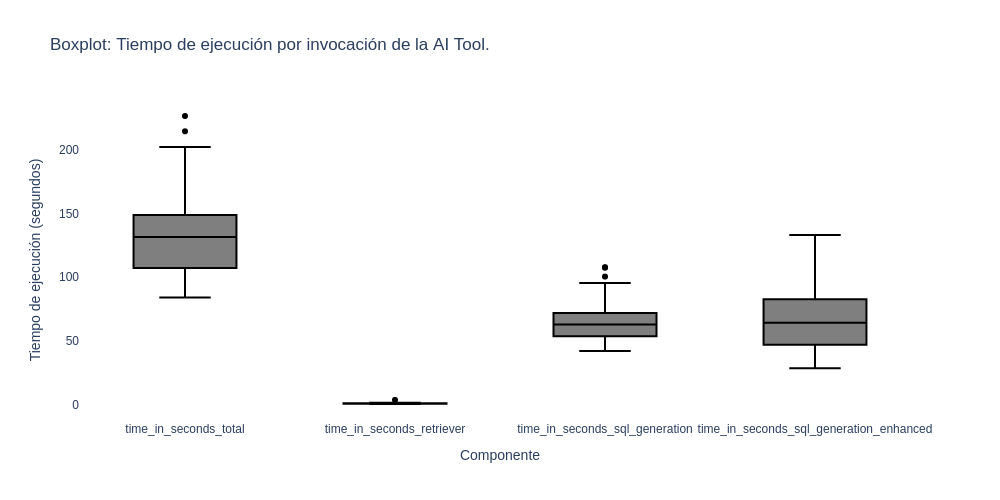

In [6]:
# Resumen de tiempos por invocación de los componentes de la AI Tool
boxplot(
    df_tiempos, 
    title="Boxplot: Tiempo de ejecución por invocación de la AI Tool.",
    value_name="Tiempo de ejecución (segundos)",
    category_name="Componente"
)

### **5. Análisis de Tokens consumidos por invocación de la AI Tool.**

#### **5.1. Tokens totales consumidos por invocación de la AI Tool.**

In [7]:
print("\nTokens consumidos totales por invocación de la AI Tool:")
display(df_tokens_totales.describe().round(2))


Tokens consumidos totales por invocación de la AI Tool:


,tokens_total_tool,tokens_total_retriever_embedding,tokens_total_sql_generation,tokens_total_sql_generation_enhanced
count,50.00,50.00,50.00,50.00
mean,44408.36,433.70,20516.74,23457.92
std,3102.14,38.96,1286.72,2567.24
min,38504.00,404.00,18439.00,19415.00
25%,42150.00,407.00,19792.25,21377.00
50%,44601.50,407.00,20304.00,23421.50
75%,46034.25,443.00,20894.50,25230.75
max,56402.00,504.00,24798.00,31185.00


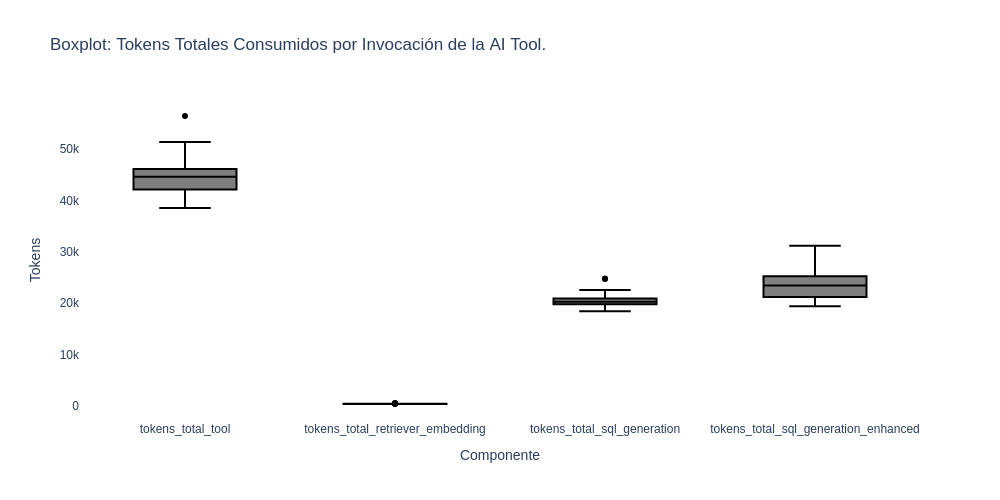

In [8]:
# Boxplot de tokens totales por invocación y de la AI Tool
boxplot(
    df_tokens_totales, 
    title="Boxplot: Tokens Totales Consumidos por Invocación de la AI Tool.",
    value_name="Tokens",
    category_name="Componente"
)

#### **5.2. Tokens totales consumidos por invocación de la AI Tool en el prompt.**

In [9]:
# Tokens consumidos en el prompt
print("\nTokens consumidos por invocación de la AI Tool en el prompt:")
display(df_tokens_detail_prompt.describe().round(2))



Tokens consumidos por invocación de la AI Tool en el prompt:


,tokens_prompt_sql_generation,tokens_prompt_sql_generation_enhanced
count,50.00,50.00
mean,13614.02,16579.76
std,36.76,407.88
min,13587.00,15851.00
25%,13589.00,16344.25
50%,13589.00,16544.50
75%,13625.00,16912.25
max,13681.00,17366.00


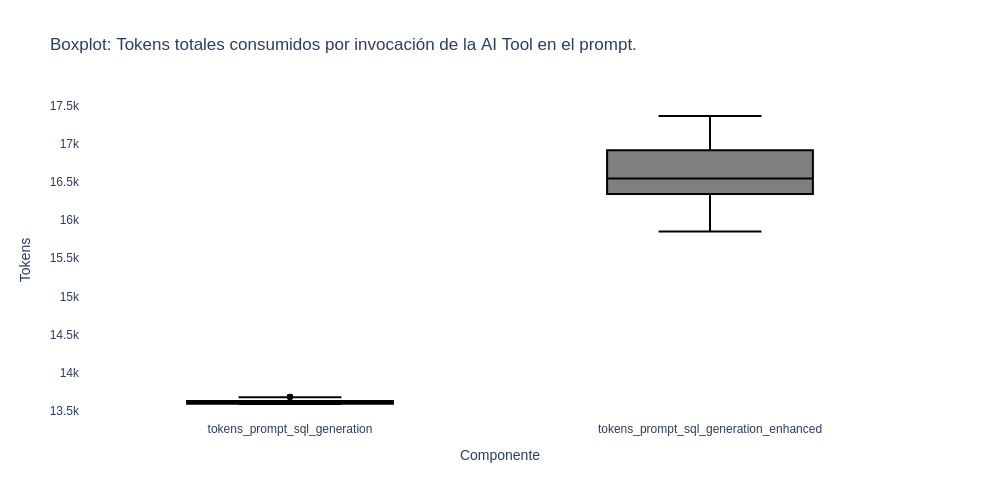

In [10]:
# Boxplot de tokens consumidos en el prompt
boxplot(
    df_tokens_detail_prompt, 
    title="Boxplot: Tokens totales consumidos por invocación de la AI Tool en el prompt.",
    value_name="Tokens",
    category_name="Componente"
)

#### **5.3. Tokens totales consumidos por invocación de la AI Tool en la respuesta.**


In [11]:
print("\nTokens consumidos por invocación de la AI Tool en la respuesta:")
display(df_tokens_detail_completion.describe().round(2))


Tokens consumidos por invocación de la AI Tool en la respuesta:


,tokens_completion_sql_generation,tokens_completion_sql_generation_enhanced
count,50.00,50.00
mean,6902.72,6878.16
std,1286.33,2460.08
min,4849.00,2800.00
25%,6149.25,5151.00
50%,6715.00,6545.00
75%,7294.25,8744.00
max,11204.00,13819.00


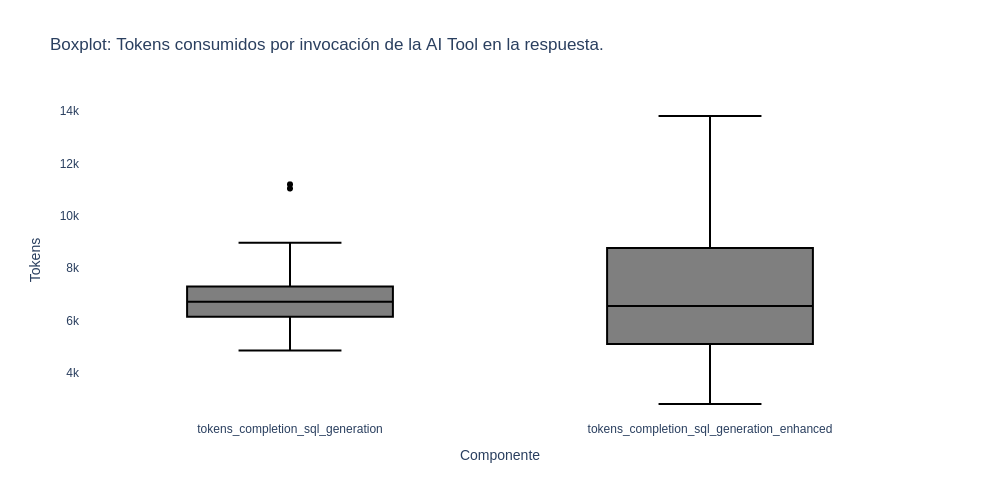

In [12]:
# Boxplot de tokens consumidos en la respuesta
boxplot(
    df_tokens_detail_completion, 
    title="Boxplot: Tokens consumidos por invocación de la AI Tool en la respuesta.",
    value_name="Tokens",
    category_name="Componente"
)


#### **5.4. Tokens totales consumidos por invocación de la AI Tool en los embeddings.**

In [13]:
# Tokens consumidos en los embeddings
print("\nTokens consumidos por invocación de la AI Tool en los embeddings:")
display(df_tokens_embedding.describe().round(2))


Tokens consumidos por invocación de la AI Tool en los embeddings:


,tokens_total_retriever_embedding
count,50.00
mean,433.70
std,38.96
min,404.00
25%,407.00
50%,407.00
75%,443.00
max,504.00


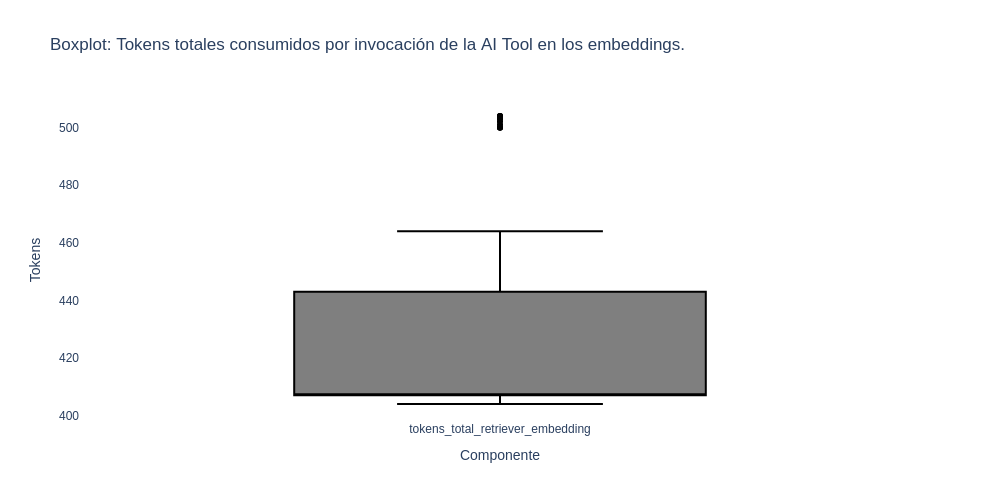

In [14]:
# Boxplot de tokens consumidos en los embeddings
boxplot(
    df_tokens_embedding, 
    title="Boxplot: Tokens totales consumidos por invocación de la AI Tool en los embeddings.",
    value_name="Tokens",
    category_name="Componente"
)

### **6. Análisis de coste por invocación de la AI Tool en (USD).**

In [15]:
# Coste por componente de la AI Tool
print("\nCoste por invocación de la AI Tool en USD:")
display(df_coste.describe().round(2))


Coste por invocación de la AI Tool en USD:


,total_cost_tool_in_dollars,total_cost_retriever_embedding_in_dollars,total_cost_sql_generation_in_dollars,total_cost_sql_generation_enhanced_in_dollars
count,50.00,50.0,50.00,50.00
mean,0.09,0.0,0.05,0.05
std,0.01,0.0,0.01,0.01
min,0.07,0.0,0.04,0.03
25%,0.08,0.0,0.04,0.04
50%,0.09,0.0,0.04,0.05
75%,0.10,0.0,0.05,0.06
max,0.14,0.0,0.06,0.08


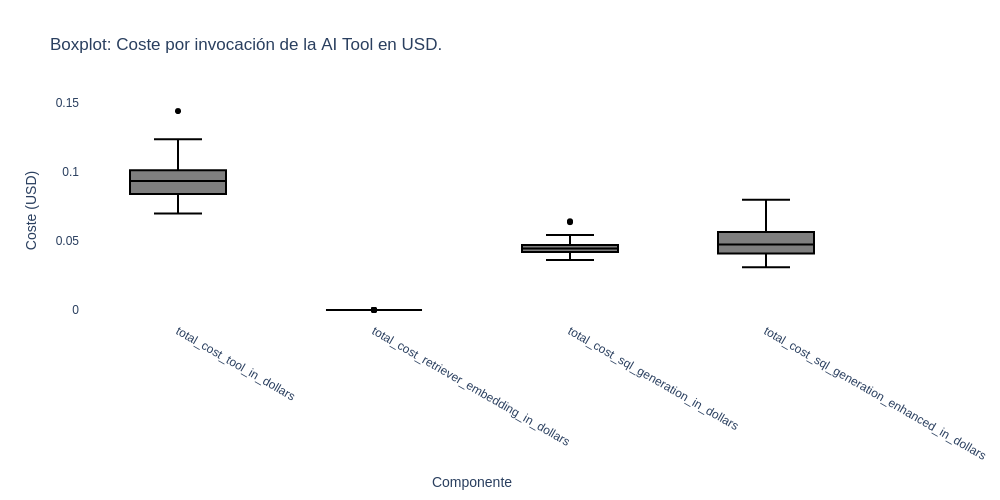

In [16]:
# Boxplot de coste por invocación de la AI Tool
boxplot(
    df_coste, 
    title="Boxplot: Coste por invocación de la AI Tool en USD.",
    value_name="Coste (USD)",
    category_name="Componente"
)

### **7. Análisis de rendimiento replicación dataset MIMICEL (benchmark).**

#### **7.1. Tasa de éxito de ejecución directa del Script SQL generado por la AI Tool.**

In [17]:
# Tasa de éxito en ejecución directa.
display(df_results_execution_summary)

,Execution,Count,%
0,Script SQL: ejecutó,37,74.0
1,Script SQL: no ejecutó,13,26.0


#### **7.2. Existencia de Script SQL Dorado. Replicación perfecta de MIMICEL (benchmark).**

Una replicación perfecta del dataframe de control MIMICEL, implicaría un combo de métricas perfectas.

En nuestro caso un **coverage = 1**, un **columns_f1 = 1** y un **events_f1 = 1**

In [18]:
# Dataframe de resultados de ejecuciones exitosas:
print("\nBúsqueda del script SQL dorado: Replicación total de MIMICEL (benchmark):")

# Filtra los casos donde coverage, columns_f1 y events_f1 son 1
df_results_ok_gold = df_results_ok[
    (df_results_ok['coverage'] == 1) &
    (df_results_ok['columns_f1'] == 1) &
    (df_results_ok['events_f1'] == 1)
    ].copy()

print(f"\nCasos encontrados: {len(df_results_ok_gold)}")
display(df_results_ok_gold)



Búsqueda del script SQL dorado: Replicación total de MIMICEL (benchmark):

Casos encontrados: 0


,uuid,tokens_total_tool,tokens_total_retriever_embedding,tokens_total_sql_generation,tokens_prompt_sql_generation,tokens_completion_sql_generation,tokens_total_sql_generation_enhanced,tokens_prompt_sql_generation_enhanced,tokens_completion_sql_generation_enhanced,total_cost_tool_in_dollars,...,events_recall,events_TP,events_FP,events_FN,columns_num_benchmark,events_num_benchmark,columns_num_ai_tool,events_num_ai_tool,total_rows_benchmark,total_rows_ai_tool


#### **7.3. Mejor Script SQL de replicación de MIMICEL (benchmark).**

Búsqueda de combinaciones de métricas perfectas.

In [19]:
# Dataframe de resultados de ejecuciones exitosas:
print("\nBúsqueda del script SQL que mejor ha replicado MIMICEL (benchmark):")

# Filtra los casos donde columns_f1 y events_f1 son 1
df_results_ok_good_performance_columnsf1_eventsf1 = df_results_ok[
    (df_results_ok['columns_f1'] == 1) &
    (df_results_ok['events_f1'] == 1)
    ].copy()

# Filtra los casos donde coverage, columns_f1
df_results_ok_good_performance_coverage_columnsf1 = df_results_ok[
    (df_results_ok['coverage'] == 1) &
    (df_results_ok['columns_f1'] == 1)
    ].copy()

# Filtra los casos donde coverage y events_f1 son 1
df_results_ok_good_performance_coverage_eventsf1 = df_results_ok[
    (df_results_ok['coverage'] == 1) &
    (df_results_ok['events_f1'] == 1)
    ].copy()


print(f"\nCasos encontrados coverage = 1 y columns_f1 = 1: \
      {len(df_results_ok_good_performance_coverage_columnsf1)}")
print(f"\nCasos encontrados coverage = 1 y events_f1 = 1: \
      {len(df_results_ok_good_performance_coverage_eventsf1)}")
print(f"\nCasos encontrados columns_f1 = 1 y events_f1 = 1: \
      {len(df_results_ok_good_performance_columnsf1_eventsf1)}")



Búsqueda del script SQL que mejor ha replicado MIMICEL (benchmark):

Casos encontrados coverage = 1 y columns_f1 = 1:       0

Casos encontrados coverage = 1 y events_f1 = 1:       0

Casos encontrados columns_f1 = 1 y events_f1 = 1:       4


Los dasaset encontrados, presentan un desempeño casi perfecto en sus métricas f1, generando las mismas columnas y eventos que nuestro dataframe de control MIMICEL.

La cobertura de filas se acera al '1', que sería una cobertura de filas perfecta.

In [20]:
# Casos uuid con mejor rendimiento
n_best_performance_uuid = df_results_ok_good_performance_columnsf1_eventsf1["uuid"].tolist()

count = 0

for uuid in n_best_performance_uuid:
    # Se muestran sus métricas de desempeño reproduciendo el dataframe de MIMICEL (benchmark)
    df_results_ok_good_performance_melt = df_results_ok_good_performance_columnsf1_eventsf1[
        # Mostramos las métricas de desempeño de los casos con mejor rendimiento
        df_results_ok_good_performance_columnsf1_eventsf1["uuid"] == uuid
        ].melt(
        var_name="métrica",
        value_name="valor"
    )

    count += 1

    print(f"Caso {count}:")

    # Métricas
    display(df_results_ok_good_performance_melt)

Caso 1:


,métrica,valor
0,uuid,1110f451-6c43-450b-b6d2-71caefa527cf
1,tokens_total_tool,45553
2,tokens_total_retriever_embedding,440
3,tokens_total_sql_generation,18492
4,tokens_prompt_sql_generation,13622
5,tokens_completion_sql_generation,4870
6,tokens_total_sql_generation_enhanced,26621
7,tokens_prompt_sql_generation_enhanced,15860
8,tokens_completion_sql_generation_enhanced,10761
9,total_cost_tool_in_dollars,0.101215


Caso 2:


,métrica,valor
0,uuid,31070fde-6df0-403a-8cdd-c78f2fc2a7ba
1,tokens_total_tool,43470
2,tokens_total_retriever_embedding,407
3,tokens_total_sql_generation,20850
4,tokens_prompt_sql_generation,13589
5,tokens_completion_sql_generation,7261
6,tokens_total_sql_generation_enhanced,22213
7,tokens_prompt_sql_generation_enhanced,16106
8,tokens_completion_sql_generation_enhanced,6107
9,total_cost_tool_in_dollars,0.091492


Caso 3:


,métrica,valor
0,uuid,bf448e8c-acc9-49b3-983d-b799a4e6e62b
1,tokens_total_tool,40194
2,tokens_total_retriever_embedding,504
3,tokens_total_sql_generation,19587
4,tokens_prompt_sql_generation,13681
5,tokens_completion_sql_generation,5906
6,tokens_total_sql_generation_enhanced,20103
7,tokens_prompt_sql_generation_enhanced,16378
8,tokens_completion_sql_generation_enhanced,3725
9,total_cost_tool_in_dollars,0.075451


Caso 4:


,métrica,valor
0,uuid,a0875ba4-ce43-4990-9658-57970b0a9315
1,tokens_total_tool,44849
2,tokens_total_retriever_embedding,407
3,tokens_total_sql_generation,19896
4,tokens_prompt_sql_generation,13589
5,tokens_completion_sql_generation,6307
6,tokens_total_sql_generation_enhanced,24546
7,tokens_prompt_sql_generation_enhanced,16240
8,tokens_completion_sql_generation_enhanced,8306
9,total_cost_tool_in_dollars,0.097117


Si recuperamos sus uuid, podemos ver la complejidad de los scripts generados.

##### **7.3.1. Caso: 1110f451-6c43-450b-b6d2-71caefa527cf**
```sql
-- Campos y eventos no encontrados:
--   * Pruebas de Laboratorio: no se encontró tabla correspondiente en el módulo ED provisto.
--   * Pruebas Radiológicas: no se encontró tabla correspondiente en el módulo ED provisto.
--   * Edad del paciente: no existe campo 'age' en el esquema proporcionado; requeriría fecha de nacimiento no disponible.

WITH
cte_entrada AS (
    -- CTE para Entrada a Urgencias desde module_ed.edstays
    SELECT
        ed.subject_id::INTEGER          AS subject_id,   -- subject_id: identificador único del paciente
        ed.stay_id::INTEGER             AS stay_id,      -- stay_id: identificador único de la estancia en urgencias
        ed.hadm_id::INTEGER             AS hadm_id,      -- hadm_id: identificador de hospitalización post-ED (NULL si no hubo)
        ed.intime::TIMESTAMP            AS timestamps,   -- timestamps: fecha y hora de llegada a urgencias
        'Entrada a Urgencias'::VARCHAR  AS activity,     -- activity: nombre del evento
        ed.gender::VARCHAR              AS gender,       -- gender: género administrativo del paciente
        ed.race::VARCHAR                AS race,         -- race: raza autoinformada del paciente
        ed.arrival_transport::VARCHAR   AS arrival_transport, -- arrival_transport: medio de llegada
        NULL::VARCHAR                   AS disposition,  -- disposition: método de salida (no aplica)
        NULL::INTEGER                   AS seq_num,      -- seq_num: secuencia de diagnóstico (no aplica)
        NULL::VARCHAR                   AS icd_code,     -- icd_code: código de diagnóstico (no aplica)
        NULL::SMALLINT                  AS icd_version,  -- icd_version: versión ICD (no aplica)
        NULL::VARCHAR                   AS icd_title,    -- icd_title: descripción diagnóstica (no aplica)
        NULL::NUMERIC                   AS acuity,       -- acuity: nivel de triaje (no aplica)
        NULL::VARCHAR                   AS chiefcomplaint, -- chiefcomplaint: queja principal (no aplica)
        NULL::NUMERIC                   AS temperature,  -- temperature: temperatura (no aplica)
        NULL::NUMERIC                   AS heartrate,    -- heartrate: frecuencia cardíaca (no aplica)
        NULL::NUMERIC                   AS resprate,     -- resprate: frecuencia respiratoria (no aplica)
        NULL::NUMERIC                   AS o2sat,        -- o2sat: saturación de oxígeno (no aplica)
        NULL::INTEGER                   AS sbp,          -- sbp: presión sistólica (no aplica)
        NULL::INTEGER                   AS dbp,          -- dbp: presión diastólica (no aplica)
        NULL::VARCHAR                   AS pain,         -- pain: nivel de dolor (no aplica)
        NULL::VARCHAR                   AS rhythm,       -- rhythm: ritmo cardíaco (no aplica)
        NULL::VARCHAR                   AS name,         -- name: nombre del medicamento (no aplica)
        NULL::VARCHAR                   AS ndc,          -- ndc: código nacional medicamento (no aplica)
        NULL::SMALLINT                  AS med_rn,       -- med_rn: fila de medicamento (no aplica)
        NULL::SMALLINT                  AS gsn_rn,       -- gsn_rn: fila GSN (no aplica)
        NULL::VARCHAR                   AS gsn,          -- gsn: Generic Sequence Number (no aplica)
        NULL::SMALLINT                  AS etc_rn,       -- etc_rn: fila ETC (no aplica)
        NULL::VARCHAR                   AS etccode,      -- etccode: código ETC (no aplica)
        NULL::VARCHAR                   AS etcdescription -- etcdescription: descripción ETC (no aplica)
    FROM module_ed.edstays ed
    WHERE ed.intime < ed.outtime     -- Validación: llegada anterior al alta
),
cte_alta AS (
    -- CTE para Salida de Urgencias con diagnósticos facturados
    SELECT
        e.subject_id::INTEGER          AS subject_id,   -- subject_id: identificador de paciente
        e.stay_id::INTEGER             AS stay_id,      -- stay_id: estancia en urgencias
        e.hadm_id::INTEGER             AS hadm_id,      -- hadm_id: hospitalización posterior
        e.outtime::TIMESTAMP           AS timestamps,   -- timestamps: fecha y hora de alta
        'Salida de Urgencias'::VARCHAR AS activity,     -- activity: nombre del evento
        e.gender::VARCHAR              AS gender,       -- gender
        e.race::VARCHAR                AS race,         -- race
        e.arrival_transport::VARCHAR   AS arrival_transport, -- arrival_transport
        e.disposition::VARCHAR         AS disposition,  -- disposition: método de alta
        d.seq_num::INTEGER             AS seq_num,      -- seq_num: secuencia de diagnóstico
        d.icd_code::VARCHAR            AS icd_code,     -- icd_code: código ICD
        d.icd_version::SMALLINT        AS icd_version,  -- icd_version: versión ICD
        d.icd_title::VARCHAR           AS icd_title,    -- icd_title: descripción diagnóstica
        NULL::NUMERIC                  AS acuity,       -- acuity
        NULL::VARCHAR                  AS chiefcomplaint, -- chiefcomplaint
        NULL::NUMERIC                  AS temperature,  -- temperature
        NULL::NUMERIC                  AS heartrate,    -- heartrate
        NULL::NUMERIC                  AS resprate,     -- resprate
        NULL::NUMERIC                  AS o2sat,        -- o2sat
        NULL::INTEGER                  AS sbp,          -- sbp
        NULL::INTEGER                  AS dbp,          -- dbp
        NULL::VARCHAR                  AS pain,         -- pain
        NULL::VARCHAR                  AS rhythm,       -- rhythm
        NULL::VARCHAR                  AS name,         -- name
        NULL::VARCHAR                  AS ndc,          -- ndc
        NULL::SMALLINT                 AS med_rn,       -- med_rn
        NULL::SMALLINT                 AS gsn_rn,       -- gsn_rn
        NULL::VARCHAR                  AS gsn,          -- gsn
        NULL::SMALLINT                 AS etc_rn,       -- etc_rn
        NULL::VARCHAR                  AS etccode,      -- etccode
        NULL::VARCHAR                  AS etcdescription -- etcdescription
    FROM module_ed.edstays e
    LEFT JOIN module_ed.diagnosis d ON e.stay_id = d.stay_id
    WHERE e.intime < e.outtime     -- Validación: llegada anterior al alta
),
cte_triaje AS (
    -- CTE para Triaje en Urgencias (timestamp = intime + 1 segundo)
    SELECT
        t.subject_id::INTEGER            AS subject_id,   -- subject_id
        t.stay_id::INTEGER               AS stay_id,      -- stay_id
        e.hadm_id::INTEGER               AS hadm_id,      -- hadm_id
        (e.intime + INTERVAL '1 second')::TIMESTAMP AS timestamps, -- timestamps de triaje
        'Triaje en Urgencias'::VARCHAR   AS activity,     -- activity
        NULL::VARCHAR                    AS gender,       -- gender
        NULL::VARCHAR                    AS race,         -- race
        NULL::VARCHAR                    AS arrival_transport, -- arrival_transport
        NULL::VARCHAR                    AS disposition,  -- disposition
        NULL::INTEGER                    AS seq_num,      -- seq_num
        NULL::VARCHAR                    AS icd_code,     -- icd_code
        NULL::SMALLINT                   AS icd_version,  -- icd_version
        NULL::VARCHAR                    AS icd_title,    -- icd_title
        t.acuity::NUMERIC                AS acuity,       -- acuity: nivel de triaje
        t.chiefcomplaint::VARCHAR        AS chiefcomplaint, -- chiefcomplaint: queja principal
        t.temperature::NUMERIC           AS temperature,  -- temperature
        t.heartrate::NUMERIC             AS heartrate,    -- heartrate
        t.resprate::NUMERIC              AS resprate,     -- resprate
        t.o2sat::NUMERIC                 AS o2sat,        -- o2sat
        t.sbp::NUMERIC                   AS sbp,          -- sbp
        t.dbp::NUMERIC                   AS dbp,          -- dbp
        t.pain::VARCHAR                  AS pain,         -- pain
        NULL::VARCHAR                    AS rhythm,       -- rhythm
        NULL::VARCHAR                    AS name,         -- name
        NULL::VARCHAR                    AS ndc,          -- ndc
        NULL::SMALLINT                   AS med_rn,       -- med_rn
        NULL::SMALLINT                   AS gsn_rn,       -- gsn_rn
        NULL::VARCHAR                    AS gsn,          -- gsn
        NULL::SMALLINT                   AS etc_rn,       -- etc_rn
        NULL::VARCHAR                    AS etccode,      -- etccode
        NULL::VARCHAR                    AS etcdescription -- etcdescription
    FROM module_ed.triage t
    JOIN module_ed.edstays e ON t.stay_id = e.stay_id
),
cte_vitals AS (
    -- CTE para Toma de Constantes Vitales desde module_ed.vitalsign
    SELECT
        v.subject_id::INTEGER          AS subject_id,   -- subject_id
        v.stay_id::INTEGER             AS stay_id,      -- stay_id
        e.hadm_id::INTEGER             AS hadm_id,      -- hadm_id
        v.charttime::TIMESTAMP         AS timestamps,   -- timestamps de registro de signos vitales
        'Toma de Constantes Vitales'::VARCHAR AS activity, -- activity
        NULL::VARCHAR                  AS gender,       -- gender
        NULL::VARCHAR                  AS race,         -- race
        NULL::VARCHAR                  AS arrival_transport, -- arrival_transport
        NULL::VARCHAR                  AS disposition,  -- disposition
        NULL::INTEGER                  AS seq_num,      -- seq_num
        NULL::VARCHAR                  AS icd_code,     -- icd_code
        NULL::SMALLINT                 AS icd_version,  -- icd_version
        NULL::VARCHAR                  AS icd_title,    -- icd_title
        NULL::NUMERIC                  AS acuity,       -- acuity
        NULL::VARCHAR                  AS chiefcomplaint, -- chiefcomplaint
        v.temperature::NUMERIC         AS temperature,  -- temperature
        v.heartrate::NUMERIC           AS heartrate,    -- heartrate
        v.resprate::NUMERIC            AS resprate,     -- resprate
        v.o2sat::NUMERIC               AS o2sat,        -- o2sat
        v.sbp::INTEGER                 AS sbp,          -- sbp
        v.dbp::INTEGER                 AS dbp,          -- dbp
        v.pain::VARCHAR                AS pain,         -- pain
        v.rhythm::VARCHAR              AS rhythm,       -- rhythm
        NULL::VARCHAR                  AS name,         -- name
        NULL::VARCHAR                  AS ndc,          -- ndc
        NULL::SMALLINT                 AS med_rn,       -- med_rn
        NULL::SMALLINT                 AS gsn_rn,       -- gsn_rn
        NULL::VARCHAR                  AS gsn,          -- gsn
        NULL::SMALLINT                 AS etc_rn,       -- etc_rn
        NULL::VARCHAR                  AS etccode,      -- etccode
        NULL::VARCHAR                  AS etcdescription -- etcdescription
    FROM module_ed.vitalsign v
    JOIN module_ed.edstays e ON v.stay_id = e.stay_id
    WHERE v.charttime <= e.outtime  -- Validación: vitales hasta la salida
),
cte_medrecon AS (
    -- CTE para Conciliación de Medicamentos desde module_ed.medrecon
    SELECT
        m.subject_id::INTEGER          AS subject_id,   -- subject_id
        m.stay_id::INTEGER             AS stay_id,      -- stay_id
        e.hadm_id::INTEGER             AS hadm_id,      -- hadm_id
        m.charttime::TIMESTAMP         AS timestamps,   -- timestamps de conciliación
        'Conciliación de Medicamentos'::VARCHAR AS activity, -- activity
        NULL::VARCHAR                  AS gender,       -- gender
        NULL::VARCHAR                  AS race,         -- race
        NULL::VARCHAR                  AS arrival_transport, -- arrival_transport
        NULL::VARCHAR                  AS disposition,  -- disposition
        NULL::INTEGER                  AS seq_num,      -- seq_num
        NULL::VARCHAR                  AS icd_code,     -- icd_code
        NULL::SMALLINT                 AS icd_version,  -- icd_version
        NULL::VARCHAR                  AS icd_title,    -- icd_title
        NULL::NUMERIC                  AS acuity,       -- acuity
        NULL::VARCHAR                  AS chiefcomplaint, -- chiefcomplaint
        NULL::NUMERIC                  AS temperature,  -- temperature
        NULL::NUMERIC                  AS heartrate,    -- heartrate
        NULL::NUMERIC                  AS resprate,     -- resprate
        NULL::NUMERIC                  AS o2sat,        -- o2sat
        NULL::INTEGER                  AS sbp,          -- sbp
        NULL::INTEGER                  AS dbp,          -- dbp
        NULL::VARCHAR                  AS pain,         -- pain
        NULL::VARCHAR                  AS rhythm,       -- rhythm
        m.name::VARCHAR                AS name,         -- name: medicamento declarado
        m.ndc::VARCHAR                 AS ndc,          -- ndc: código nacional
        NULL::SMALLINT                 AS med_rn,       -- med_rn
        NULL::SMALLINT                 AS gsn_rn,       -- gsn_rn
        m.gsn::VARCHAR                 AS gsn,          -- gsn: Generic Sequence Number
        m.etc_rn::SMALLINT             AS etc_rn,       -- etc_rn: fila ETC
        m.etccode::VARCHAR             AS etccode,      -- etccode: código ETC
        m.etcdescription::VARCHAR      AS etcdescription -- etcdescription: descripción ETC
    FROM module_ed.medrecon m
    JOIN module_ed.edstays e ON m.stay_id = e.stay_id
    WHERE m.charttime <= e.outtime  -- Validación: conciliación hasta la salida
),
cte_pyxis AS (
    -- CTE para Dispensación de Medicamentos desde module_ed.pyxis
    SELECT
        p.subject_id::INTEGER          AS subject_id,   -- subject_id
        p.stay_id::INTEGER             AS stay_id,      -- stay_id
        e.hadm_id::INTEGER             AS hadm_id,      -- hadm_id
        p.charttime::TIMESTAMP         AS timestamps,   -- timestamps de dispensación
        'Dispensación de Medicamentos'::VARCHAR AS activity, -- activity
        NULL::VARCHAR                  AS gender,       -- gender
        NULL::VARCHAR                  AS race,         -- race
        NULL::VARCHAR                  AS arrival_transport, -- arrival_transport
        NULL::VARCHAR                  AS disposition,  -- disposition
        NULL::INTEGER                  AS seq_num,      -- seq_num
        NULL::VARCHAR                  AS icd_code,     -- icd_code
        NULL::SMALLINT                 AS icd_version,  -- icd_version
        NULL::VARCHAR                  AS icd_title,    -- icd_title
        NULL::NUMERIC                  AS acuity,       -- acuity
        NULL::VARCHAR                  AS chiefcomplaint, -- chiefcomplaint
        NULL::NUMERIC                  AS temperature,  -- temperature
        NULL::NUMERIC                  AS heartrate,    -- heartrate
        NULL::NUMERIC                  AS resprate,     -- resprate
        NULL::NUMERIC                  AS o2sat,        -- o2sat
        NULL::INTEGER                  AS sbp,          -- sbp
        NULL::INTEGER                  AS dbp,          -- dbp
        NULL::VARCHAR                  AS pain,         -- pain
        NULL::VARCHAR                  AS rhythm,       -- rhythm
        p.name::VARCHAR                AS name,         -- name: medicamento dispensado
        NULL::VARCHAR                  AS ndc,          -- ndc
        p.med_rn::SMALLINT             AS med_rn,       -- med_rn: fila de medicamento
        p.gsn_rn::SMALLINT             AS gsn_rn,       -- gsn_rn: fila GSN
        p.gsn::VARCHAR                 AS gsn,          -- gsn: Generic Sequence Number
        NULL::SMALLINT                 AS etc_rn,       -- etc_rn
        NULL::VARCHAR                  AS etccode,      -- etccode
        NULL::VARCHAR                  AS etcdescription -- etcdescription
    FROM module_ed.pyxis p
    JOIN module_ed.edstays e ON p.stay_id = e.stay_id
    WHERE p.charttime <= e.outtime  -- Validación: dispensación hasta la salida
),
final AS (
    -- Unión de todos los eventos en un único log
    SELECT * FROM cte_entrada
    UNION ALL
    SELECT * FROM cte_alta
    UNION ALL
    SELECT * FROM cte_triaje
    UNION ALL
    SELECT * FROM cte_vitals
    UNION ALL
    SELECT * FROM cte_medrecon
    UNION ALL
    SELECT * FROM cte_pyxis
)
-- Selección final ordenada por paciente y marca de tiempo
SELECT *
FROM final
ORDER BY subject_id ASC, timestamps ASC;
```

##### **7.3.2. Caso: 31070fde-6df0-403a-8cdd-c78f2fc2a7ba**

```sql
-- Campos y eventos NO implementados debido a falta de tablas en el esquema:
--   • id_intervention_quirúrgica (no existe tabla de intervenciones quirúrgicas)
--   • Pruebas de Laboratorio (no existe tabla module_ed.laboratory ni similar)
--   • Pruebas Radiológicas (no existe tabla module_ed.radiology ni similar)

WITH
    ------------------------------------------------------------------------
    -- CTE: cte_arrival
    -- Evento: Entrada a Urgencias (ED)
    -- Tabla origen: module_ed.edstays
    -- Validación: intime < outtime
    ------------------------------------------------------------------------
    cte_arrival AS (
        SELECT
            e.subject_id    ::INTEGER   AS subject_id,          -- Identificador único de paciente
            e.stay_id       ::INTEGER   AS stay_id,             -- Identificador de estancia en urgencias
            e.hadm_id       ::INTEGER   AS hadm_id,             -- Identificador de hospitalización posterior (NULL si no aplica)
            e.intime        ::TIMESTAMP AS timestamps,          -- Fecha/hora de ingreso a urgencias
            'Entrada a Urgencias (ED)'::VARCHAR AS activity,     -- Nombre del evento
            e.gender        ::VARCHAR   AS gender,              -- Género administrativo del paciente
            e.arrival_transport::VARCHAR AS arrival_transport,  -- Medio de llegada (WALK IN, AMBULANCE, …)
            e.race          ::VARCHAR   AS race,                -- Raza autoinformada del paciente
            NULL            ::VARCHAR   AS disposition,         -- Método de salida (no aplica aquí)
            NULL            ::NUMERIC   AS temperature,         -- Temperatura (no tomada en este evento)
            NULL            ::NUMERIC   AS heartrate,           -- Frecuencia cardíaca
            NULL            ::NUMERIC   AS resprate,            -- Frecuencia respiratoria
            NULL            ::NUMERIC   AS o2sat,               -- Saturación de oxígeno
            NULL            ::NUMERIC   AS sbp,                 -- Presión sistólica
            NULL            ::NUMERIC   AS dbp,                 -- Presión diastólica
            NULL            ::VARCHAR   AS pain,                -- Nivel de dolor
            NULL            ::NUMERIC   AS acuity,              -- Nivel de triaje
            NULL            ::VARCHAR   AS chiefcomplaint,      -- Queja principal
            NULL            ::VARCHAR   AS rhythm,              -- Ritmo cardíaco
            NULL            ::VARCHAR   AS name,                -- Nombre de medicamento (no aplica)
            NULL            ::VARCHAR   AS gsn,                 -- Código Genérico de Secuencia (no aplica)
            NULL            ::VARCHAR   AS ndc,                 -- Código Nacional de Medicamentos (no aplica)
            NULL            ::SMALLINT  AS etc_rn,              -- Secuencia ETC (no aplica)
            NULL            ::VARCHAR   AS etccode,             -- Código ETC (no aplica)
            NULL            ::VARCHAR   AS etcdescription,      -- Descripción ETC (no aplica)
            NULL            ::SMALLINT  AS med_rn,              -- Secuencia de dispensación Pyxis (no aplica)
            NULL            ::SMALLINT  AS gsn_rn,              -- Secuencia GSN en Pyxis (no aplica)
            NULL            ::INTEGER   AS seq_num,             -- Secuencia de diagnóstico (no aplica)
            NULL            ::VARCHAR   AS icd_code,            -- Código ICD (no aplica)
            NULL            ::SMALLINT  AS icd_version,         -- Versión ICD (no aplica)
            NULL            ::VARCHAR   AS icd_title            -- Descripción ICD (no aplica)
        FROM
            module_ed.edstays e
        WHERE
            e.intime < e.outtime
    ),

    ------------------------------------------------------------------------
    -- CTE: cte_triage
    -- Evento: Triaje en Urgencias (ED)
    -- Tabla origen: module_ed.triage  (timestamps imputados como intime+1s)
    -- Validación: (intime+1s) BETWEEN intime AND outtime
    ------------------------------------------------------------------------
    cte_triage AS (
        SELECT
            t.subject_id    ::INTEGER   AS subject_id,
            t.stay_id       ::INTEGER   AS stay_id,
            e.hadm_id       ::INTEGER   AS hadm_id,
            (e.intime + INTERVAL '1 second')::TIMESTAMP AS timestamps,
            'Triaje en Urgencias (ED)'::VARCHAR AS activity,
            NULL            ::VARCHAR   AS gender,
            NULL            ::VARCHAR   AS arrival_transport,
            NULL            ::VARCHAR   AS race,
            NULL            ::VARCHAR   AS disposition,
            t.temperature   ::NUMERIC   AS temperature,        -- Temperatura en Fahrenheit/Celsius
            t.heartrate     ::NUMERIC   AS heartrate,          -- Latidos/minuto
            t.resprate      ::NUMERIC   AS resprate,           -- Respiraciones/minuto
            t.o2sat         ::NUMERIC   AS o2sat,              -- Saturación periférica de O₂ %
            t.sbp           ::NUMERIC   AS sbp,                -- Presión arterial sistólica
            t.dbp           ::NUMERIC   AS dbp,                -- Presión arterial diastólica
            t.pain          ::VARCHAR   AS pain,               -- Nivel de dolor (0-10)
            t.acuity        ::NUMERIC   AS acuity,             -- Nivel de prioridad ESI (1-5)
            t.chiefcomplaint::VARCHAR   AS chiefcomplaint,     -- Queja principal libre-texto
            NULL            ::VARCHAR   AS rhythm,
            NULL            ::VARCHAR   AS name,
            NULL            ::VARCHAR   AS gsn,
            NULL            ::VARCHAR   AS ndc,
            NULL            ::SMALLINT  AS etc_rn,
            NULL            ::VARCHAR   AS etccode,
            NULL            ::VARCHAR   AS etcdescription,
            NULL            ::SMALLINT  AS med_rn,
            NULL            ::SMALLINT  AS gsn_rn,
            NULL            ::INTEGER   AS seq_num,
            NULL            ::VARCHAR   AS icd_code,
            NULL            ::SMALLINT  AS icd_version,
            NULL            ::VARCHAR   AS icd_title
        FROM
            module_ed.triage t
            JOIN module_ed.edstays e ON t.stay_id = e.stay_id
        WHERE
            (e.intime + INTERVAL '1 second') <= e.outtime
    ),

    ------------------------------------------------------------------------
    -- CTE: cte_vitals
    -- Evento: Toma de Constantes Vitales
    -- Tabla origen: module_ed.vitalsign
    -- Validación: charttime BETWEEN intime AND outtime
    ------------------------------------------------------------------------
    cte_vitals AS (
        SELECT
            v.subject_id    ::INTEGER   AS subject_id,
            v.stay_id       ::INTEGER   AS stay_id,
            e.hadm_id       ::INTEGER   AS hadm_id,
            v.charttime     ::TIMESTAMP AS timestamps,
            'Toma de Constantes Vitales'::VARCHAR AS activity,
            NULL            ::VARCHAR   AS gender,
            NULL            ::VARCHAR   AS arrival_transport,
            NULL            ::VARCHAR   AS race,
            NULL            ::VARCHAR   AS disposition,
            v.temperature   ::NUMERIC   AS temperature,
            v.heartrate     ::NUMERIC   AS heartrate,
            v.resprate      ::NUMERIC   AS resprate,
            v.o2sat         ::NUMERIC   AS o2sat,
            v.sbp           ::INTEGER   AS sbp,
            v.dbp           ::INTEGER   AS dbp,
            v.pain          ::VARCHAR   AS pain,
            NULL            ::NUMERIC   AS acuity,
            NULL            ::VARCHAR   AS chiefcomplaint,
            v.rhythm        ::VARCHAR   AS rhythm,
            NULL            ::VARCHAR   AS name,
            NULL            ::VARCHAR   AS gsn,
            NULL            ::VARCHAR   AS ndc,
            NULL            ::SMALLINT  AS etc_rn,
            NULL            ::VARCHAR   AS etccode,
            NULL            ::VARCHAR   AS etcdescription,
            NULL            ::SMALLINT  AS med_rn,
            NULL            ::SMALLINT  AS gsn_rn,
            NULL            ::INTEGER   AS seq_num,
            NULL            ::VARCHAR   AS icd_code,
            NULL            ::SMALLINT  AS icd_version,
            NULL            ::VARCHAR   AS icd_title
        FROM
            module_ed.vitalsign v
            JOIN module_ed.edstays e ON v.stay_id = e.stay_id
        WHERE
            v.charttime BETWEEN e.intime AND e.outtime
    ),

    ------------------------------------------------------------------------
    -- CTE: cte_medrecon
    -- Evento: Conciliación de Medicamentos
    -- Tabla origen: module_ed.medrecon
    -- Validación: charttime BETWEEN intime AND outtime
    ------------------------------------------------------------------------
    cte_medrecon AS (
        SELECT
            m.subject_id    ::INTEGER   AS subject_id,
            m.stay_id       ::INTEGER   AS stay_id,
            e.hadm_id       ::INTEGER   AS hadm_id,
            m.charttime     ::TIMESTAMP AS timestamps,
            'Conciliación de Medicamentos'::VARCHAR AS activity,
            NULL            ::VARCHAR   AS gender,
            NULL            ::VARCHAR   AS arrival_transport,
            NULL            ::VARCHAR   AS race,
            NULL            ::VARCHAR   AS disposition,
            NULL            ::NUMERIC   AS temperature,
            NULL            ::NUMERIC   AS heartrate,
            NULL            ::NUMERIC   AS resprate,
            NULL            ::NUMERIC   AS o2sat,
            NULL            ::NUMERIC   AS sbp,
            NULL            ::NUMERIC   AS dbp,
            NULL            ::VARCHAR   AS pain,
            NULL            ::NUMERIC   AS acuity,
            NULL            ::VARCHAR   AS chiefcomplaint,
            NULL            ::VARCHAR   AS rhythm,
            m.name          ::VARCHAR   AS name,               -- Nombre de medicamento informado
            m.gsn           ::VARCHAR   AS gsn,                -- Generic Sequence Number
            m.ndc           ::VARCHAR   AS ndc,                -- National Drug Code
            m.etc_rn        ::SMALLINT  AS etc_rn,             -- Secuencia en Enhanced Therapeutic Class
            m.etccode       ::VARCHAR   AS etccode,            -- Código ETC
            m.etcdescription::VARCHAR   AS etcdescription,     -- Descripción ETC
            NULL            ::SMALLINT  AS med_rn,
            NULL            ::SMALLINT  AS gsn_rn,
            NULL            ::INTEGER   AS seq_num,
            NULL            ::VARCHAR   AS icd_code,
            NULL            ::SMALLINT  AS icd_version,
            NULL            ::VARCHAR   AS icd_title
        FROM
            module_ed.medrecon m
            JOIN module_ed.edstays e ON m.stay_id = e.stay_id
        WHERE
            m.charttime BETWEEN e.intime AND e.outtime
    ),

    ------------------------------------------------------------------------
    -- CTE: cte_pyxis
    -- Evento: Dispensación de Medicamentos
    -- Tabla origen: module_ed.pyxis
    -- Validación: charttime BETWEEN intime AND outtime
    ------------------------------------------------------------------------
    cte_pyxis AS (
        SELECT
            p.subject_id    ::INTEGER   AS subject_id,
            p.stay_id       ::INTEGER   AS stay_id,
            e.hadm_id       ::INTEGER   AS hadm_id,
            p.charttime     ::TIMESTAMP AS timestamps,
            'Dispensación de Medicamentos'::VARCHAR AS activity,
            NULL            ::VARCHAR   AS gender,
            NULL            ::VARCHAR   AS arrival_transport,
            NULL            ::VARCHAR   AS race,
            NULL            ::VARCHAR   AS disposition,
            NULL            ::NUMERIC   AS temperature,
            NULL            ::NUMERIC   AS heartrate,
            NULL            ::NUMERIC   AS resprate,
            NULL            ::NUMERIC   AS o2sat,
            NULL            ::NUMERIC   AS sbp,
            NULL            ::NUMERIC   AS dbp,
            NULL            ::VARCHAR   AS pain,
            NULL            ::NUMERIC   AS acuity,
            NULL            ::VARCHAR   AS chiefcomplaint,
            NULL            ::VARCHAR   AS rhythm,
            p.name          ::VARCHAR   AS name,               -- Nombre de medicamento dispensado
            p.gsn           ::VARCHAR   AS gsn,                -- Generic Sequence Number
            NULL            ::VARCHAR   AS ndc,
            NULL            ::SMALLINT  AS etc_rn,
            NULL            ::VARCHAR   AS etccode,
            NULL            ::VARCHAR   AS etcdescription,
            p.med_rn        ::SMALLINT  AS med_rn,             -- Secuencia de dispensación
            p.gsn_rn        ::SMALLINT  AS gsn_rn,             -- Secuencia GSN en Pyxis
            NULL            ::INTEGER   AS seq_num,
            NULL            ::VARCHAR   AS icd_code,
            NULL            ::SMALLINT  AS icd_version,
            NULL            ::VARCHAR   AS icd_title
        FROM
            module_ed.pyxis p
            JOIN module_ed.edstays e ON p.stay_id = e.stay_id
        WHERE
            p.charttime BETWEEN e.intime AND e.outtime
    ),

    ------------------------------------------------------------------------
    -- CTE: cte_discharge
    -- Evento: Salida de Urgencias (ED) + Diagnósticos facturados
    -- Tablas origen: module_ed.edstays, module_ed.diagnosis
    -- Validación: stay.intime < stay.outtime
    ------------------------------------------------------------------------
    cte_discharge AS (
        SELECT
            e.subject_id    ::INTEGER   AS subject_id,
            e.stay_id       ::INTEGER   AS stay_id,
            e.hadm_id       ::INTEGER   AS hadm_id,
            e.outtime       ::TIMESTAMP AS timestamps,         -- Fecha/hora de salida de urgencias
            'Salida de Urgencias (ED)'::VARCHAR AS activity,
            NULL            ::VARCHAR   AS gender,
            NULL            ::VARCHAR   AS arrival_transport,
            NULL            ::VARCHAR   AS race,
            e.disposition   ::VARCHAR   AS disposition,        -- Método de alta (HOME, ADMITTED, …)
            NULL            ::NUMERIC   AS temperature,
            NULL            ::NUMERIC   AS heartrate,
            NULL            ::NUMERIC   AS resprate,
            NULL            ::NUMERIC   AS o2sat,
            NULL            ::NUMERIC   AS sbp,
            NULL            ::NUMERIC   AS dbp,
            NULL            ::VARCHAR   AS pain,
            NULL            ::NUMERIC   AS acuity,
            NULL            ::VARCHAR   AS chiefcomplaint,
            NULL            ::VARCHAR   AS rhythm,
            NULL            ::VARCHAR   AS name,
            NULL            ::VARCHAR   AS gsn,
            NULL            ::VARCHAR   AS ndc,
            NULL            ::SMALLINT  AS etc_rn,
            NULL            ::VARCHAR   AS etccode,
            NULL            ::VARCHAR   AS etcdescription,
            NULL            ::SMALLINT  AS med_rn,
            NULL            ::SMALLINT  AS gsn_rn,
            d.seq_num       ::INTEGER   AS seq_num,            -- Número de diagnóstico (1=primario,…)
            d.icd_code      ::VARCHAR   AS icd_code,           -- Código ICD-9/10
            d.icd_version   ::SMALLINT  AS icd_version,        -- Versión ICD
            d.icd_title     ::VARCHAR   AS icd_title           -- Descripción textual del diagnóstico
        FROM
            module_ed.edstays e
            JOIN module_ed.diagnosis d ON e.stay_id = d.stay_id
        WHERE
            e.intime < e.outtime
    ),

    ------------------------------------------------------------------------
    -- UNION de todos los eventos para formar el Log de Eventos
    ------------------------------------------------------------------------
    log AS (
        SELECT * FROM cte_arrival
        UNION ALL
        SELECT * FROM cte_triage
        UNION ALL
        SELECT * FROM cte_vitals
        UNION ALL
        SELECT * FROM cte_medrecon
        UNION ALL
        SELECT * FROM cte_pyxis
        UNION ALL
        SELECT * FROM cte_discharge
    )

-- Selección final ordenada por paciente y marca temporal
SELECT
    *
FROM
    log
ORDER BY
    subject_id   ASC,
    timestamps   ASC;
```

##### **7.3.3. Caso: bf448e8c-acc9-49b3-983d-b799a4e6e62b**

```sql
-- Campos y eventos NO encontrados en el esquema proporcionado:
--   • age: no existe columna de edad en ninguna tabla del módulo ED.
--   • Pruebas de Laboratorio: no se encontró tabla ni vista asociada.
--   • Pruebas Radiológicas: no se encontró tabla ni vista asociada.

WITH
    -- Llegada del paciente a Urgencias: datos de admisión en edstays.
    arrival AS (
        SELECT
            e.subject_id,
            e.hadm_id,
            e.stay_id,
            e.intime                        AS timestamps,
            'Llegada de Paciente (ED)'::VARCHAR    AS activity,
            e.arrival_transport             AS arrival_transport,
            e.gender                        AS gender,
            e.race                          AS race,
            NULL::VARCHAR(255)              AS disposition,
            NULL::INTEGER                   AS seq_num,
            NULL::VARCHAR(8)                AS icd_code,
            NULL::SMALLINT                  AS icd_version,
            NULL::VARCHAR                   AS icd_title,
            NULL::NUMERIC                   AS temperature,
            NULL::NUMERIC                   AS heartrate,
            NULL::NUMERIC                   AS resprate,
            NULL::NUMERIC                   AS o2sat,
            NULL::INTEGER                   AS sbp,
            NULL::INTEGER                   AS dbp,
            NULL::VARCHAR                   AS rhythm,
            NULL::VARCHAR                   AS pain,
            NULL::NUMERIC                   AS acuity,
            NULL::VARCHAR(255)              AS chiefcomplaint,
            NULL::VARCHAR(255)              AS name,
            NULL::VARCHAR(10)               AS gsn,
            NULL::VARCHAR(12)               AS ndc,
            NULL::SMALLINT                  AS med_rn,
            NULL::SMALLINT                  AS gsn_rn,
            NULL::SMALLINT                  AS etc_rn,
            NULL::VARCHAR(8)                AS etccode,
            NULL::VARCHAR(255)              AS etcdescription
        FROM module_ed.edstays e
    ),

    -- Triaje: datos de triage con timestamp imputado (intime + 1 segundo).
    triage_event AS (
        SELECT
            t.subject_id,
            e.hadm_id,
            t.stay_id,
            (e.intime + INTERVAL '1 second') AS timestamps,
            'Triaje en Urgencias (ED)'::VARCHAR AS activity,
            NULL::VARCHAR(50)               AS arrival_transport,
            NULL::VARCHAR(1)                AS gender,
            NULL::VARCHAR(60)               AS race,
            NULL::VARCHAR(255)              AS disposition,
            NULL::INTEGER                   AS seq_num,
            NULL::VARCHAR(8)                AS icd_code,
            NULL::SMALLINT                  AS icd_version,
            NULL::VARCHAR                   AS icd_title,
            t.temperature                   AS temperature,
            t.heartrate                     AS heartrate,
            t.resprate                      AS resprate,
            t.o2sat                         AS o2sat,
            t.sbp::INTEGER                  AS sbp,
            t.dbp::INTEGER                  AS dbp,
            NULL::VARCHAR                   AS rhythm,
            t.pain                          AS pain,
            t.acuity                        AS acuity,
            t.chiefcomplaint                AS chiefcomplaint,
            NULL::VARCHAR(255)              AS name,
            NULL::VARCHAR(10)               AS gsn,
            NULL::VARCHAR(12)               AS ndc,
            NULL::SMALLINT                  AS med_rn,
            NULL::SMALLINT                  AS gsn_rn,
            NULL::SMALLINT                  AS etc_rn,
            NULL::VARCHAR(8)                AS etccode,
            NULL::VARCHAR(255)              AS etcdescription
        FROM module_ed.triage t
        JOIN module_ed.edstays e
          ON t.stay_id = e.stay_id
    ),

    -- Toma de constantes vitales: todas las mediciones en vitalsign, filtradas antes del alta.
    vitals AS (
        SELECT
            v.subject_id,
            e.hadm_id,
            v.stay_id,
            v.charttime                     AS timestamps,
            'Toma de Constantes Vitales'::VARCHAR AS activity,
            NULL::VARCHAR(50)               AS arrival_transport,
            NULL::VARCHAR(1)                AS gender,
            NULL::VARCHAR(60)               AS race,
            NULL::VARCHAR(255)              AS disposition,
            NULL::INTEGER                   AS seq_num,
            NULL::VARCHAR(8)                AS icd_code,
            NULL::SMALLINT                  AS icd_version,
            NULL::VARCHAR                   AS icd_title,
            v.temperature                   AS temperature,
            v.heartrate                     AS heartrate,
            v.resprate                      AS resprate,
            v.o2sat                         AS o2sat,
            v.sbp                           AS sbp,
            v.dbp                           AS dbp,
            v.rhythm                        AS rhythm,
            v.pain                          AS pain,
            NULL::NUMERIC                   AS acuity,
            NULL::VARCHAR(255)              AS chiefcomplaint,
            NULL::VARCHAR(255)              AS name,
            NULL::VARCHAR(10)               AS gsn,
            NULL::VARCHAR(12)               AS ndc,
            NULL::SMALLINT                  AS med_rn,
            NULL::SMALLINT                  AS gsn_rn,
            NULL::SMALLINT                  AS etc_rn,
            NULL::VARCHAR(8)                AS etccode,
            NULL::VARCHAR(255)              AS etcdescription
        FROM module_ed.vitalsign v
        JOIN module_ed.edstays e
          ON v.stay_id = e.stay_id
        WHERE v.charttime <= e.outtime
    ),

    -- Conciliación de medicamentos: medrecon charted antes del alta.
    med_recon AS (
        SELECT
            m.subject_id,
            e.hadm_id,
            m.stay_id,
            m.charttime                     AS timestamps,
            'Conciliación de Medicamentos'::VARCHAR AS activity,
            NULL::VARCHAR(50)               AS arrival_transport,
            NULL::VARCHAR(1)                AS gender,
            NULL::VARCHAR(60)               AS race,
            NULL::VARCHAR(255)              AS disposition,
            NULL::INTEGER                   AS seq_num,
            NULL::VARCHAR(8)                AS icd_code,
            NULL::SMALLINT                  AS icd_version,
            NULL::VARCHAR                   AS icd_title,
            NULL::NUMERIC                   AS temperature,
            NULL::NUMERIC                   AS heartrate,
            NULL::NUMERIC                   AS resprate,
            NULL::NUMERIC                   AS o2sat,
            NULL::INTEGER                   AS sbp,
            NULL::INTEGER                   AS dbp,
            NULL::VARCHAR                   AS rhythm,
            NULL::VARCHAR                   AS pain,
            NULL::NUMERIC                   AS acuity,
            NULL::VARCHAR(255)              AS chiefcomplaint,
            m.name                          AS name,
            m.gsn                           AS gsn,
            m.ndc                           AS ndc,
            NULL::SMALLINT                  AS med_rn,
            NULL::SMALLINT                  AS gsn_rn,
            m.etc_rn                        AS etc_rn,
            m.etccode                       AS etccode,
            m.etcdescription                AS etcdescription
        FROM module_ed.medrecon m
        JOIN module_ed.edstays e
          ON m.stay_id = e.stay_id
        WHERE m.charttime <= e.outtime
    ),

    -- Dispensación de Medicamentos: pyxis charted antes del alta.
    dispensacion AS (
        SELECT
            p.subject_id,
            e.hadm_id,
            p.stay_id,
            p.charttime                     AS timestamps,
            'Dispensación de Medicamentos'::VARCHAR AS activity,
            NULL::VARCHAR(50)               AS arrival_transport,
            NULL::VARCHAR(1)                AS gender,
            NULL::VARCHAR(60)               AS race,
            NULL::VARCHAR(255)              AS disposition,
            NULL::INTEGER                   AS seq_num,
            NULL::VARCHAR(8)                AS icd_code,
            NULL::SMALLINT                  AS icd_version,
            NULL::VARCHAR                   AS icd_title,
            NULL::NUMERIC                   AS temperature,
            NULL::NUMERIC                   AS heartrate,
            NULL::NUMERIC                   AS resprate,
            NULL::NUMERIC                   AS o2sat,
            NULL::INTEGER                   AS sbp,
            NULL::INTEGER                   AS dbp,
            NULL::VARCHAR                   AS rhythm,
            NULL::VARCHAR                   AS pain,
            NULL::NUMERIC                   AS acuity,
            NULL::VARCHAR(255)              AS chiefcomplaint,
            p.name                          AS name,
            p.gsn                           AS gsn,
            NULL::VARCHAR(12)               AS ndc,
            p.med_rn                        AS med_rn,
            p.gsn_rn                        AS gsn_rn,
            NULL::SMALLINT                  AS etc_rn,
            NULL::VARCHAR(8)                AS etccode,
            NULL::VARCHAR(255)              AS etcdescription
        FROM module_ed.pyxis p
        JOIN module_ed.edstays e
          ON p.stay_id = e.stay_id
        WHERE p.charttime <= e.outtime
    ),

    -- Alta de Urgencias: salida de ED y registros de diagnóstico asociados.
    discharge AS (
        SELECT
            d.subject_id,
            e.hadm_id,
            d.stay_id,
            e.outtime                       AS timestamps,
            'Alta de Urgencias (ED)'::VARCHAR AS activity,
            NULL::VARCHAR(50)               AS arrival_transport,
            NULL::VARCHAR(1)                AS gender,
            NULL::VARCHAR(60)               AS race,
            e.disposition                   AS disposition,
            d.seq_num                       AS seq_num,
            d.icd_code                      AS icd_code,
            d.icd_version                   AS icd_version,
            d.icd_title                     AS icd_title,
            NULL::NUMERIC                   AS temperature,
            NULL::NUMERIC                   AS heartrate,
            NULL::NUMERIC                   AS resprate,
            NULL::NUMERIC                   AS o2sat,
            NULL::INTEGER                   AS sbp,
            NULL::INTEGER                   AS dbp,
            NULL::VARCHAR                   AS rhythm,
            NULL::VARCHAR                   AS pain,
            NULL::NUMERIC                   AS acuity,
            NULL::VARCHAR(255)              AS chiefcomplaint,
            NULL::VARCHAR(255)              AS name,
            NULL::VARCHAR(10)               AS gsn,
            NULL::VARCHAR(12)               AS ndc,
            NULL::SMALLINT                  AS med_rn,
            NULL::SMALLINT                  AS gsn_rn,
            NULL::SMALLINT                  AS etc_rn,
            NULL::VARCHAR(8)                AS etccode,
            NULL::VARCHAR(255)              AS etcdescription
        FROM module_ed.diagnosis d
        JOIN module_ed.edstays e
          ON d.stay_id = e.stay_id
    )

SELECT *
FROM (
    SELECT * FROM arrival
    UNION ALL
    SELECT * FROM triage_event
    UNION ALL
    SELECT * FROM vitals
    UNION ALL
    SELECT * FROM med_recon
    UNION ALL
    SELECT * FROM dispensacion
    UNION ALL
    SELECT * FROM discharge
) AS log_events
ORDER BY subject_id ASC, timestamps ASC;
```

##### **7.3.4. Caso: a0875ba4-ce43-4990-9658-57970b0a9315**
```sql
-- Eventos solicitados sin tabla en el esquema corporativo y por tanto omitidos:
--   • Pruebas de Laboratorio  
--   • Pruebas Radiológicas  
-- Campo solicitado no encontrado en el esquema:
--   • Edad (age)

-- Descripción de columnas usadas en todos los CTEs:
--   subject_id     : Identificador único del paciente.
--   stay_id        : Identificador único de la estancia en Urgencias.
--   hadm_id        : Identificador de la hospitalización tras el ED (NULL si no existe).
--   timestamps     : Marca temporal del evento (TIMESTAMP).
--   activity       : Nombre de la actividad/evento.
--   arrival_transport : Medio de llegada al ED (WALK IN, AMBULANCE, …).
--   gender         : Género administrativo del paciente (M/F).
--   race           : Raza autoinformada del paciente.
--   disposition    : Método de salida del ED (HOME, ADMITTED, …).
--   seq_num        : Secuencia de prioridad de diagnóstico (1=primario).
--   icd_code       : Código de diagnóstico (ICD-9/ICD-10).
--   icd_version    : Versión del ICD aplicado (9 o 10).
--   icd_title      : Descripción textual del diagnóstico.
--   temperature    : Temperatura corporal en °F (algunas pueden venir en °C).
--   heartrate      : Frecuencia cardíaca (lpm).
--   resprate       : Frecuencia respiratoria (resp/min).
--   o2sat          : Saturación de oxígeno (%).
--   sbp            : Presión arterial sistólica (mmHg).
--   dbp            : Presión arterial diastólica (mmHg).
--   pain           : Nivel de dolor auto-reportado (0–10).
--   acuity         : Nivel de triaje (ESI 1–5).
--   chiefcomplaint : Queja principal (texto libre).
--   rhythm         : Ritmo cardíaco (texto libre).
--   name           : Nombre del medicamento (medrecon/pyxis).
--   gsn            : Generic Sequence Number del medicamento.
--   ndc            : National Drug Code (medrecon).
--   etc_rn         : Secuencia en Enhanced Therapeutic Class.
--   etccode        : Código de Enhanced Therapeutic Class.
--   etcdescription : Descripción de Enhanced Therapeutic Class.
--   med_rn         : Número de fila para agrupación en Pyxis.
--   gsn_rn         : Secuencia de GSN en Pyxis.

WITH
-- 1. Filtra estancias de ED válidas (intime < outtime)
cte_stays_valid AS (
  SELECT
    subject_id::INTEGER,
    hadm_id::INTEGER,
    stay_id::INTEGER,
    intime::TIMESTAMP,
    outtime::TIMESTAMP,
    gender::VARCHAR,
    race::VARCHAR,
    arrival_transport::VARCHAR,
    disposition::VARCHAR
  FROM module_ed.edstays
  WHERE intime < outtime
),

-- 2. Entrada a Urgencias
cte_entrada AS (
  SELECT
    s.subject_id,
    s.stay_id,
    s.hadm_id,
    s.intime            AS timestamps,
    'Entrada a Urgencias'::VARCHAR AS activity,
    s.arrival_transport,
    s.gender,
    s.race,
    NULL::VARCHAR       AS disposition,
    NULL::INTEGER       AS seq_num,
    NULL::VARCHAR       AS icd_code,
    NULL::SMALLINT      AS icd_version,
    NULL::VARCHAR       AS icd_title,
    NULL::NUMERIC       AS temperature,
    NULL::NUMERIC       AS heartrate,
    NULL::NUMERIC       AS resprate,
    NULL::NUMERIC       AS o2sat,
    NULL::INTEGER       AS sbp,
    NULL::INTEGER       AS dbp,
    NULL::VARCHAR       AS pain,
    NULL::NUMERIC       AS acuity,
    NULL::VARCHAR       AS chiefcomplaint,
    NULL::VARCHAR       AS rhythm,
    NULL::VARCHAR       AS name,
    NULL::VARCHAR       AS gsn,
    NULL::VARCHAR       AS ndc,
    NULL::SMALLINT      AS etc_rn,
    NULL::VARCHAR       AS etccode,
    NULL::VARCHAR       AS etcdescription,
    NULL::SMALLINT      AS med_rn,
    NULL::SMALLINT      AS gsn_rn
  FROM cte_stays_valid s
),

-- 3. Salida de Urgencias con diagnóstico(s)
cte_salida AS (
  SELECT
    s.subject_id,
    s.stay_id,
    s.hadm_id,
    s.outtime           AS timestamps,
    'Salida de Urgencias'::VARCHAR AS activity,
    NULL::VARCHAR       AS arrival_transport,
    NULL::VARCHAR       AS gender,
    NULL::VARCHAR       AS race,
    s.disposition,
    d.seq_num::INTEGER,
    d.icd_code,
    d.icd_version,
    d.icd_title,
    NULL::NUMERIC       AS temperature,
    NULL::NUMERIC       AS heartrate,
    NULL::NUMERIC       AS resprate,
    NULL::NUMERIC       AS o2sat,
    NULL::INTEGER       AS sbp,
    NULL::INTEGER       AS dbp,
    NULL::VARCHAR       AS pain,
    NULL::NUMERIC       AS acuity,
    NULL::VARCHAR       AS chiefcomplaint,
    NULL::VARCHAR       AS rhythm,
    NULL::VARCHAR       AS name,
    NULL::VARCHAR       AS gsn,
    NULL::VARCHAR       AS ndc,
    NULL::SMALLINT      AS etc_rn,
    NULL::VARCHAR       AS etccode,
    NULL::VARCHAR       AS etcdescription,
    NULL::SMALLINT      AS med_rn,
    NULL::SMALLINT      AS gsn_rn
  FROM cte_stays_valid s
  LEFT JOIN module_ed.diagnosis d
    ON s.stay_id = d.stay_id
),

-- 4. Triaje en Urgencias (intime + 1 segundo)
cte_triaje AS (
  SELECT
    t.subject_id,
    t.stay_id,
    s.hadm_id,
    (s.intime + INTERVAL '1 second') AS timestamps,
    'Triaje en Urgencias'::VARCHAR AS activity,
    NULL::VARCHAR       AS arrival_transport,
    NULL::VARCHAR       AS gender,
    NULL::VARCHAR       AS race,
    NULL::VARCHAR       AS disposition,
    NULL::INTEGER       AS seq_num,
    NULL::VARCHAR       AS icd_code,
    NULL::SMALLINT      AS icd_version,
    NULL::VARCHAR       AS icd_title,
    t.temperature,
    t.heartrate,
    t.resprate,
    t.o2sat,
    t.sbp,
    t.dbp,
    t.pain,
    t.acuity,
    t.chiefcomplaint,
    NULL::VARCHAR       AS rhythm,
    NULL::VARCHAR       AS name,
    NULL::VARCHAR       AS gsn,
    NULL::VARCHAR       AS ndc,
    NULL::SMALLINT      AS etc_rn,
    NULL::VARCHAR       AS etccode,
    NULL::VARCHAR       AS etcdescription,
    NULL::SMALLINT      AS med_rn,
    NULL::SMALLINT      AS gsn_rn
  FROM module_ed.triage t
  JOIN cte_stays_valid s
    ON t.stay_id = s.stay_id
  WHERE (s.intime + INTERVAL '1 second') <= s.outtime
),

-- 5. Toma de Constantes Vitales
cte_vitals AS (
  SELECT
    v.subject_id,
    v.stay_id,
    s.hadm_id,
    v.charttime         AS timestamps,
    'Toma de Constantes Vitales'::VARCHAR AS activity,
    NULL::VARCHAR       AS arrival_transport,
    NULL::VARCHAR       AS gender,
    NULL::VARCHAR       AS race,
    NULL::VARCHAR       AS disposition,
    NULL::INTEGER       AS seq_num,
    NULL::VARCHAR       AS icd_code,
    NULL::SMALLINT      AS icd_version,
    NULL::VARCHAR       AS icd_title,
    v.temperature,
    v.heartrate,
    v.resprate,
    v.o2sat,
    v.sbp,
    v.dbp,
    v.pain,
    NULL::NUMERIC       AS acuity,
    NULL::VARCHAR       AS chiefcomplaint,
    v.rhythm,
    NULL::VARCHAR       AS name,
    NULL::VARCHAR       AS gsn,
    NULL::VARCHAR       AS ndc,
    NULL::SMALLINT      AS etc_rn,
    NULL::VARCHAR       AS etccode,
    NULL::VARCHAR       AS etcdescription,
    NULL::SMALLINT      AS med_rn,
    NULL::SMALLINT      AS gsn_rn
  FROM module_ed.vitalsign v
  JOIN cte_stays_valid s
    ON v.stay_id = s.stay_id
  WHERE v.charttime BETWEEN s.intime AND s.outtime
),

-- 6. Conciliación de Medicamentos
cte_medrecon AS (
  SELECT
    m.subject_id,
    m.stay_id,
    s.hadm_id,
    m.charttime         AS timestamps,
    'Conciliación de Medicamentos'::VARCHAR AS activity,
    NULL::VARCHAR       AS arrival_transport,
    NULL::VARCHAR       AS gender,
    NULL::VARCHAR       AS race,
    NULL::VARCHAR       AS disposition,
    NULL::INTEGER       AS seq_num,
    NULL::VARCHAR       AS icd_code,
    NULL::SMALLINT      AS icd_version,
    NULL::VARCHAR       AS icd_title,
    NULL::NUMERIC       AS temperature,
    NULL::NUMERIC       AS heartrate,
    NULL::NUMERIC       AS resprate,
    NULL::NUMERIC       AS o2sat,
    NULL::INTEGER       AS sbp,
    NULL::INTEGER       AS dbp,
    NULL::VARCHAR       AS pain,
    NULL::NUMERIC       AS acuity,
    NULL::VARCHAR       AS chiefcomplaint,
    NULL::VARCHAR       AS rhythm,
    m.name,
    m.gsn,
    m.ndc,
    m.etc_rn,
    m.etccode,
    m.etcdescription,
    NULL::SMALLINT      AS med_rn,
    NULL::SMALLINT      AS gsn_rn
  FROM module_ed.medrecon m
  JOIN cte_stays_valid s
    ON m.stay_id = s.stay_id
  WHERE m.charttime BETWEEN s.intime AND s.outtime
),

-- 7. Dispensación de Medicamentos (Pyxis)
cte_pyxis AS (
  SELECT
    p.subject_id,
    p.stay_id,
    s.hadm_id,
    p.charttime         AS timestamps,
    'Dispensación de Medicamentos'::VARCHAR AS activity,
    NULL::VARCHAR       AS arrival_transport,
    NULL::VARCHAR       AS gender,
    NULL::VARCHAR       AS race,
    NULL::VARCHAR       AS disposition,
    NULL::INTEGER       AS seq_num,
    NULL::VARCHAR       AS icd_code,
    NULL::SMALLINT      AS icd_version,
    NULL::VARCHAR       AS icd_title,
    NULL::NUMERIC       AS temperature,
    NULL::NUMERIC       AS heartrate,
    NULL::NUMERIC       AS resprate,
    NULL::NUMERIC       AS o2sat,
    NULL::INTEGER       AS sbp,
    NULL::INTEGER       AS dbp,
    NULL::VARCHAR       AS pain,
    NULL::NUMERIC       AS acuity,
    NULL::VARCHAR       AS chiefcomplaint,
    NULL::VARCHAR       AS rhythm,
    p.name,
    p.gsn,
    NULL::VARCHAR       AS ndc,
    NULL::SMALLINT      AS etc_rn,
    NULL::VARCHAR       AS etccode,
    NULL::VARCHAR       AS etcdescription,
    p.med_rn,
    p.gsn_rn
  FROM module_ed.pyxis p
  JOIN cte_stays_valid s
    ON p.stay_id = s.stay_id
  WHERE p.charttime BETWEEN s.intime AND s.outtime
),

-- 8. Unión de todos los eventos en orden cronológico
cte_union AS (
  SELECT * FROM cte_entrada
  UNION ALL
  SELECT * FROM cte_salida
  UNION ALL
  SELECT * FROM cte_triaje
  UNION ALL
  SELECT * FROM cte_vitals
  UNION ALL
  SELECT * FROM cte_medrecon
  UNION ALL
  SELECT * FROM cte_pyxis
)

SELECT *
FROM cte_union
ORDER BY subject_id ASC, timestamps ASC;
```

#### **7.4. Rendimiento 'coverage' replicación filas de MIMICEL (benchmark).**

**Coverage**: Índice de cobertura entre las filas generadas por la AI Tool y las filas esperadas en el dataset de control MIMICEL.  
  $$ \text{Coverage} = \frac{\text{Rows}_{\text{AI Tool}}}{\text{Rows}_{\text{MIMICEL}}} $$

Casos `Coverage=1` perfecto: 0 casos.


,coverage
count,37.00
mean,1.00
std,0.03
min,0.94
25%,1.00
50%,1.00
75%,1.00
max,1.06


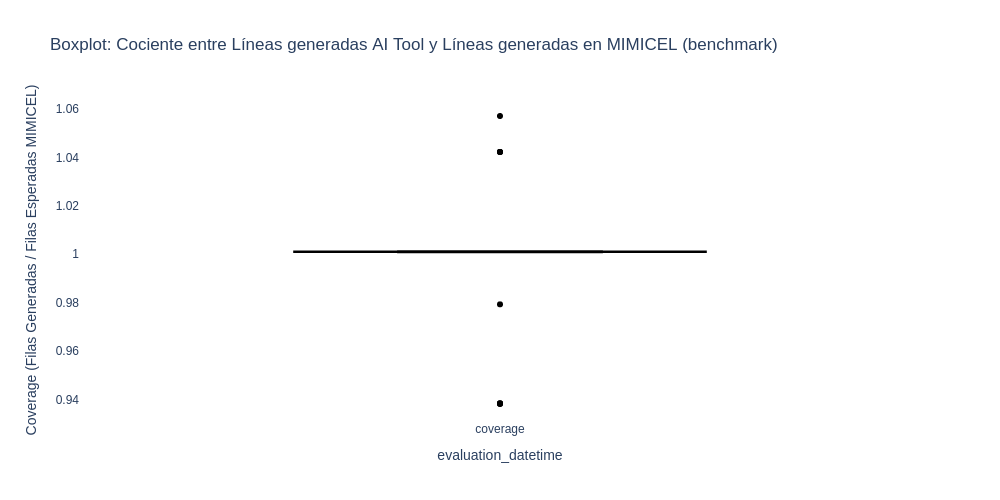

In [21]:
# Bloque df de métricas rendimiento coverage.
# Nos indicaría que número de filas han generado los scripts SQL de la AI Tool
df_results_ok_coverage = df_results_ok[['uuid', 'coverage']].copy()

# Conteo de casos donde coverage es 1
conteo_coverage_1 = len(df_results_ok_coverage['coverage'][
    (df_results_ok_coverage['coverage'] == 1)
])

print(f"Casos `Coverage=1` perfecto: {conteo_coverage_1} casos.")
# Mostramos el resumen de las métricas de coverage
display(df_results_ok_coverage.describe().round(2))

# Boxplot de coverage
boxplot(
    df_results_ok_coverage, 
    title="Boxplot: Cociente entre Líneas generadas AI Tool y Líneas generadas en MIMICEL (benchmark)",
    value_name="Coverage (Filas Generadas / Filas Esperadas MIMICEL)",
    category_name="evaluation_datetime"
    )


Se observa como los scripts SQL ejecutados, presentan una mediana cercana al '1', exceptuando algunos casos atípicos.

Esta métrica es complementaria, ya que no asegura la igualdad de los valores entre filas.

Su intención es medir cuantas filas está generando la AI Tool comparándola con las filas del dataset de control MIMICEL.

Valores próximos a 1, indican una cobertura en el número de filas similar entre ambos datasets. 

Si la métrica viene acompañada de valores F1 próximos a 1 en columnas y eventos, nos sugiere que el script generado es candidato a revisión manual para determinar la exactitud de la replicación.



#### **7.5. Rendimiento de la AI Tool en la generación de columnas.**


##### **7.5.1. Rendimiento generación de columnas: True Positive (TP), False Positive (FP), False Negative (FN).**

- **True Positive (TP)**: Columnas **esperadas** en MIMICEL y **generadas** por la AI Tool.  
- **False Negative (FN)**: Columnas **esperadas** en MIMICEL y **no generadas** por la AI Tool.  
- **False Positive (FP)**: Columnas **no esperadas** en MIMICEL y **generadas** por la AI Tool.

,columns_f1,columns_precision,columns_recall
count,37.00,37.00,37.00
mean,0.91,0.90,0.93
std,0.07,0.10,0.09
min,0.74,0.77,0.65
25%,0.87,0.78,0.90
50%,0.92,0.93,0.97
75%,0.98,1.00,1.00
max,1.00,1.00,1.00


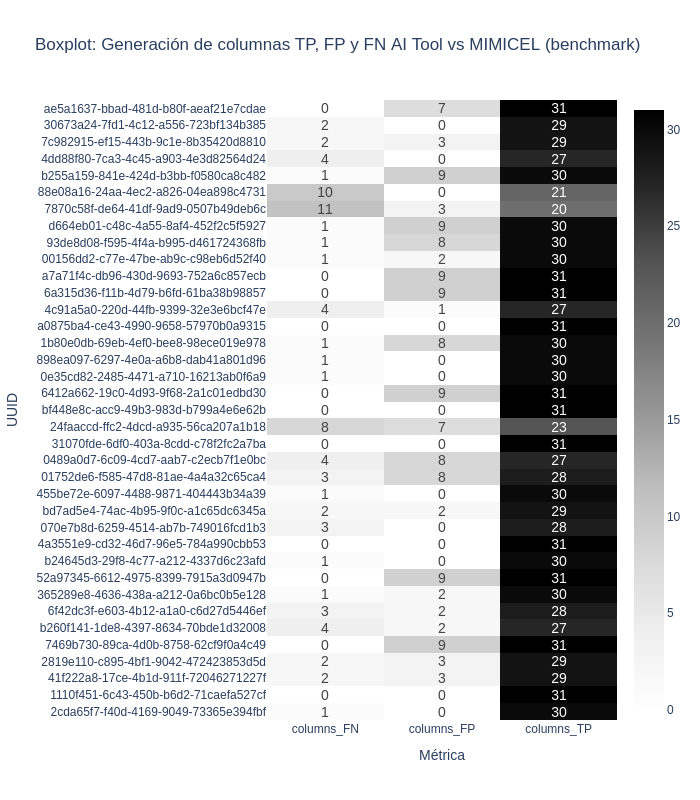

In [22]:
# Resumen de las métricas de rendimiento de la clasificación de columnas de la AI Tool
# en la replicación del dataset de control MIMICEL (benchmark)
display(df_columns[['columns_f1', 'columns_precision', 'columns_recall']].describe().round(2))

# Generamos un heatmap con el rendimiento de la clasificación de columnas
# generadas por la AI Tool vs las columnas esperadas en MIMICEL (benchmark)
heatmap(
    df_columns,
    title="Boxplot: Generación de columnas TP, FP y FN AI Tool vs MIMICEL (benchmark)",
    value_columns=['columns_TP', 'columns_FP', 'columns_FN'],
    text_format='%{text}',
    height=800
    )

##### **7.5.2. Rendimiento generación de columnas: F1, Precision, Recall.**

- **F1 Score**: Media Armónica entre Precisión y Recall.  
  $$ F_{1_{col}} = 2 \cdot \frac{\text{Precision}_{col} \cdot \text{Recall}_{col}}{\text{Precision}_{col} + \text{Recall}_{col}} $$

- **Precisión**: Proporción de las columnas generadas por la AI Tool presentes en el dataset de control MIMICEL sobre el total de columnas generadas por la AI Tool.  
  $$ \text{Precision}_{col} = \frac{TP_{col}}{TP_{col} + FP_{col}} $$

- **Recall**: Proporción de las columnas esperadas en el dataset de control MIMICEL que fueron generadas por la AI Tool.  
  $$ \text{Recall}_{col} = \frac{TP_{col}}{TP_{col} + FN_{col}} $$

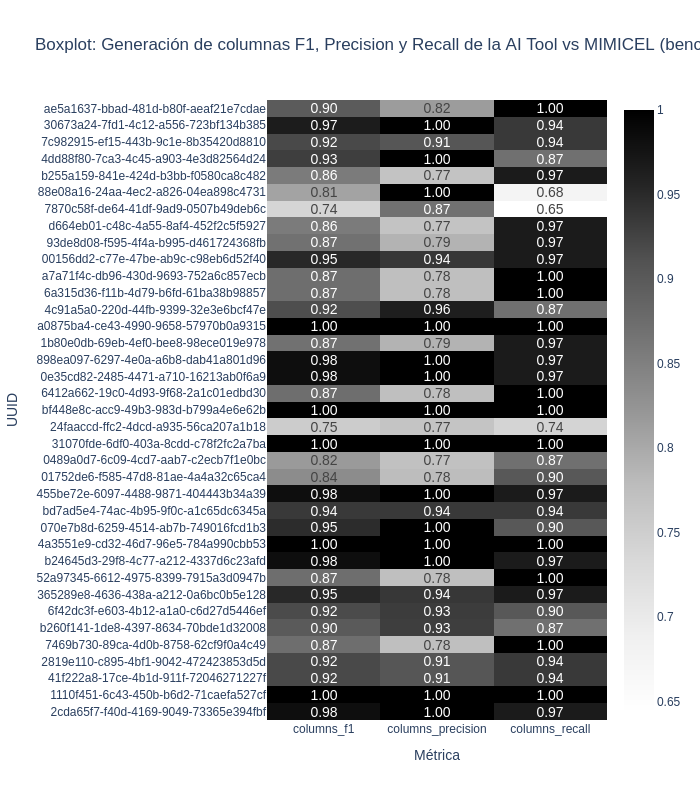

In [23]:
# Generamos un heatmap con el rendimiento de la clasificación de columnas
heatmap(
    df_columns,
    title="Boxplot: Generación de columnas F1, Precision y Recall de la AI Tool vs MIMICEL (benchmark)",
    value_columns=['columns_f1', 'columns_precision', 'columns_recall'],
    text_format='%{text:.2f}',
    height=800
    )

,columns_f1,columns_precision,columns_recall
count,37.00,37.00,37.00
mean,0.91,0.90,0.93
std,0.07,0.10,0.09
min,0.74,0.77,0.65
25%,0.87,0.78,0.90
50%,0.92,0.93,0.97
75%,0.98,1.00,1.00
max,1.00,1.00,1.00


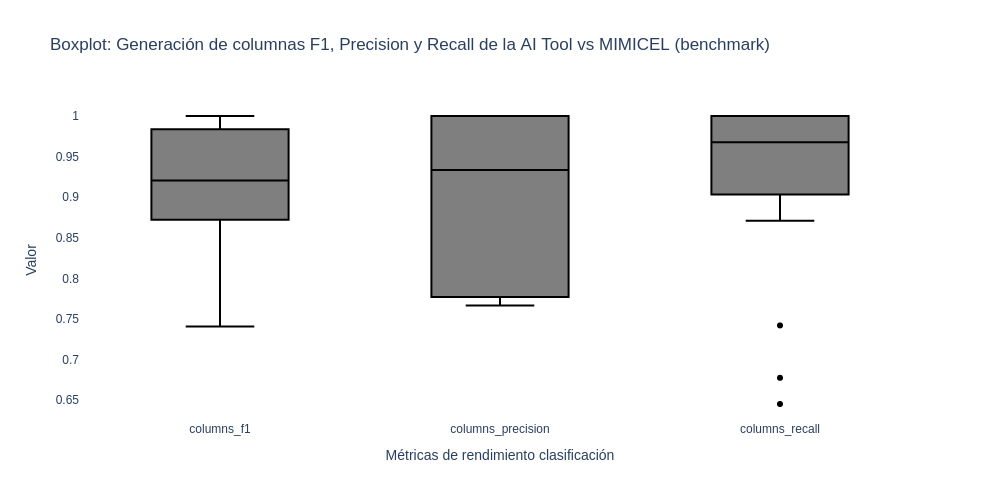

In [24]:
# Mostramos el resumen de las métricas de rendimiento de la clasificación de columnas de la AI Tool
# en la replicación de MIMICEL (benchmark)
display(df_columns[['columns_f1', 'columns_precision', 'columns_recall']].describe().round(2))

# Generamos boxplots con las métricas de rendimiento de la clasificación de 
# columnas generadas por la AI Tool vs las columnas esperadas en MIMICEL (benchmark)    
boxplot(
    df_columns[['uuid','columns_f1', 'columns_precision', 'columns_recall']],
    title="Boxplot: Generación de columnas F1, Precision y Recall de la AI Tool vs MIMICEL (benchmark)",
    value_name='Valor',
    category_name='Métricas de rendimiento clasificación'
    )

#### **7.6. Rendimiento de la AI Tool en la generación de eventos.**

##### **7.6.1. Rendimiento generación de eventos: True Positive (TP), False Positive (FP), False Negative (FN).**

- **True Positive (TP)**: Eventos **esperados** en MIMICEL y **generados** por la AI Tool.  
- **False Negative (FN)**: Eventos **esperados** en MIMICEL y **no generados** por la AI Tool.  
- **False Positive (FP)**: Eventos **no esperados** en MIMICEL y **generados** por la AI Tool.

,events_TP,events_FP,events_FN
count,37.00,37.00,37.00
mean,5.84,10.97,0.16
std,0.37,62.89,0.37
min,5.00,0.00,0.00
25%,6.00,0.00,0.00
50%,6.00,0.00,0.00
75%,6.00,0.00,0.00
max,6.00,383.00,1.00


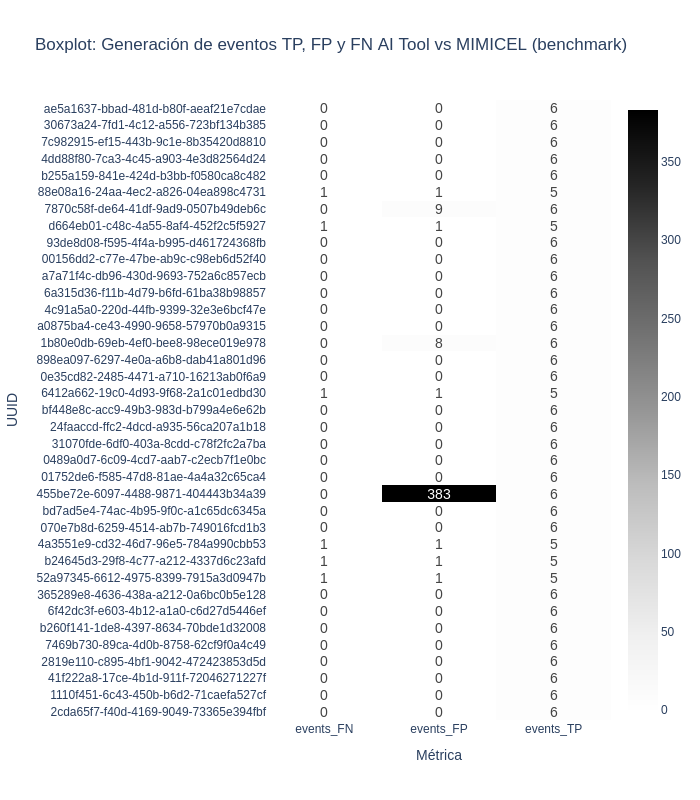

In [25]:
# Generamos resumen y un heatmap de los eventos generados clasificados como TP, FP y FN
display(df_events[['events_TP', 'events_FP', 'events_FN']].describe().round(2))

heatmap(
    df_events,
    title="Boxplot: Generación de eventos TP, FP y FN AI Tool vs MIMICEL (benchmark)",
    value_columns=['events_TP', 'events_FP', 'events_FN'],
    text_format='%{text}',
    height=800
)

##### **7.6.2. Rendimiento generación de columnas: F1, Precision, Recall.**

- **F1 Score**: Media Armónica entre Precisión y Recall.  
  $$ F_{1_{eve}} = 2 \cdot \frac{\text{Precision}_{eve} \cdot \text{Recall}_{eve}}{\text{Precision}_{eve} + \text{Recall}_{eve}} $$

- **Precisión**: Proporción de los eventos generados por la AI Tool presentes en el dataset de control MIMICEL sobre el total de eventos generados por la AI Tool.  
  $$ \text{Precision}_{eve} = \frac{TP_{eve}}{TP_{eve} + FP_{eve}} $$

- **Recall**: Proporción de los eventos esperados en el dataset de control MIMICEL que fueron generados por la AI Tool.  
  $$ \text{Recall}_{eve} = \frac{TP_{eve}}{TP_{eve} + FN_{eve}} $$

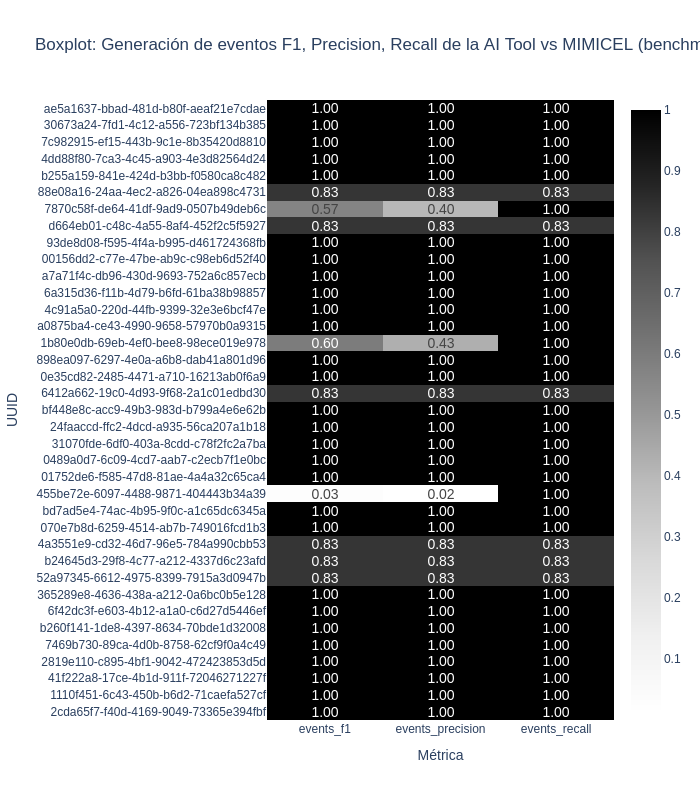

In [26]:
# Generamos un heatmap con el rendimiento de la clasificación de eventos
# generados por la AI Tool vs los eventos esperados en MIMICEL (benchmark)
heatmap(
    df_events,
    title="Boxplot: Generación de eventos F1, Precision, Recall de la AI Tool vs MIMICEL (benchmark)",
    value_columns=['events_precision', 'events_recall', 'events_f1'],
    text_format='%{text:.2f}',
    height=800
)

,events_f1,events_precision,events_recall
count,37.00,37.00,37.00
mean,0.92,0.91,0.97
std,0.19,0.21,0.06
min,0.03,0.02,0.83
25%,1.00,1.00,1.00
50%,1.00,1.00,1.00
75%,1.00,1.00,1.00
max,1.00,1.00,1.00


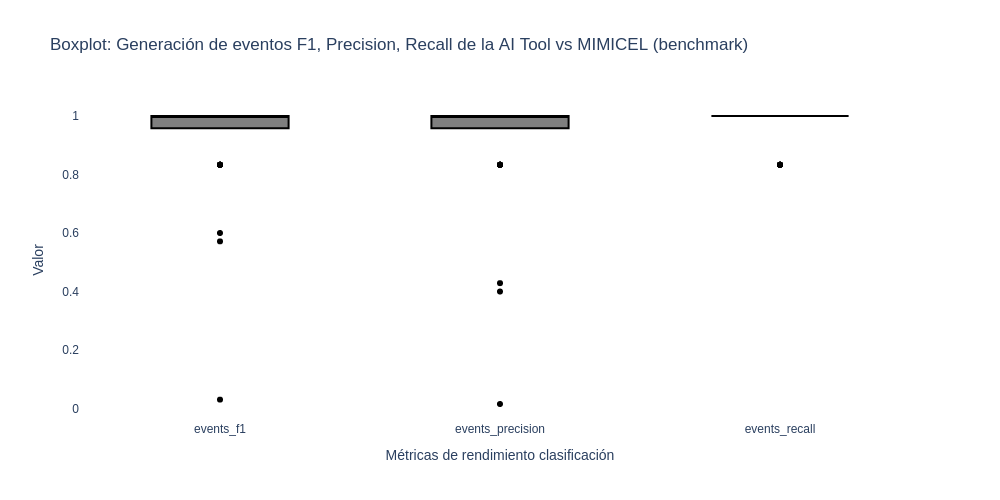

In [27]:
# Generamos boxplots con las métricas de rendimiento de la clasificación de 
# eventos generados por la AI Tool vs los eventos esperados en MIMICEL (benchmark)

display(df_events[['events_f1', 'events_precision', 'events_recall']].describe().round(2))

boxplot(
    df_events[['uuid','events_f1', 'events_precision', 'events_recall']],
    title="Boxplot: Generación de eventos F1, Precision, Recall de la AI Tool vs MIMICEL (benchmark)",
    value_name='Valor',
    category_name='Métricas de rendimiento clasificación'
    )

# Histograma en plotly



### **8. Resultado final.**

#### **8.1. Test Normalidad (Schapiro)**

In [28]:
df_final_stats_n20 = df_results_clean.iloc[:,:17].copy()

# Bloque n15 de resultados exitosos
df_final_stats_n15 = df_results_ok.iloc[:,18:32].copy()

In [29]:
def shapiro_summary(df):
    result = []
    for col in df.select_dtypes(include=[np.number]).columns:
        # usamos la librería scipy para el test de shapiro
        stat, p = shapiro(df[col].dropna())
        # Creamos un diccionario con los resultados
        result.append({
            "metric": col,
            "n":     df[col].count(),
            "W":     round(stat, 4),
            "pval":  round(p, 4),
            "normal": p >= 0.05       # True se acepta normalidad
        })

    # Lo pasamos a dataframe para evaluar comportamiento.
    return pd.DataFrame(result)

# Test de Shapiro para el bloque n20: Métricas de rendimiento de generación de scripts SQL
schapiro_results_n20 = shapiro_summary(df_final_stats_n20)

# Test de Shapiro para el bloque n15: Métricas de rendimiento replicación de dataset de control MIMICEL
schapiro_results_n15 = shapiro_summary(df_final_stats_n15)

# Capturamos el total de métricas que superan el test
schapiro_true_results_n20 = len(schapiro_results_n20[schapiro_results_n20['normal'] == True])
schapiro_true_results_n15 = len(schapiro_results_n15[schapiro_results_n15['normal'] == True])

print(f"Total Métricas que han superado el test de normalidad Schapiro:" +
        f"{schapiro_true_results_n20 + schapiro_true_results_n15} de " +
        f"{len(schapiro_results_n20) + len(schapiro_results_n15)}.")

# Mostramos los resultados de todas.
display(schapiro_results_n20)
display(schapiro_results_n15)

Total Métricas que han superado el test de normalidad Schapiro:4 de 29.


,metric,n,W,pval,normal
0,tokens_total_tool,50,0.9152,0.0016,False
1,tokens_total_retriever_embedding,50,0.6870,0.0000,False
2,tokens_total_sql_generation,50,0.8921,0.0003,False
3,tokens_prompt_sql_generation,50,0.6797,0.0000,False
4,tokens_completion_sql_generation,50,0.8954,0.0003,False
5,tokens_total_sql_generation_enhanced,50,0.9542,0.0507,True
6,tokens_prompt_sql_generation_enhanced,50,0.9734,0.3175,True
7,tokens_completion_sql_generation_enhanced,50,0.9662,0.1615,True
8,total_cost_tool_in_dollars,50,0.9182,0.0020,False
9,total_cost_retriever_embedding_in_dollars,50,0.6870,0.0000,False


,metric,n,W,pval,normal
0,coverage,37,0.6780,0.0000,False
1,columns_f1,37,0.9327,0.0271,False
2,columns_precision,37,0.7891,0.0000,False
3,columns_recall,37,0.7198,0.0000,False
4,columns_TP,37,0.7198,0.0000,False
5,columns_FP,37,0.7793,0.0000,False
6,columns_FN,37,0.7198,0.0000,False
7,events_f1,37,0.4686,0.0000,False
8,events_precision,37,0.4747,0.0000,False
9,events_recall,37,0.4451,0.0000,False


**Nota:**  
Dado que las dos muestras analizadas (n=50 y n=37) en su mayoría las métricas no superan el test de normalidad. Se decide homogeneizar los cálculos de intervalos de confianza con técnicas bootstrap, para mantener homogeneidad y coherencia sobre los criterios aplicados a las métricas.

#### **8.2. IC mediante Bootstrap**

In [30]:
# Calculamos estadísticas completas junto con IC bootstrap para las métricas de tokens

# Tiempo
df_results_stats_time = df_metrics_bootstrap(df_tiempos)

# Tokens
df_results_stats_tokens = df_metrics_bootstrap(df_tokens)

# Coste
df_results_stats_cost = df_metrics_bootstrap(df_coste)

# Coverage
df_results_stats_coverage = df_metrics_bootstrap(df_results_ok_coverage)

# Generación de eventos
df_results_stats_events = df_metrics_bootstrap(df_events)

# Generación de columnas
df_results_stats_columns = df_metrics_bootstrap(df_columns)


##### **8.2.1. Rendimiento Tiempos de Ejecución por invocación AI Tool.**

In [31]:
# Visualización de los resultados
print("Métricas rendimiento Tiempo")
display(df_results_stats_time)

Métricas rendimiento Tiempo


,metric,n,mean,median,std,IQR,min,max,bootstrap_ci95_low,bootstrap_ci95_high
0,time_in_seconds_total,50,132.025,131.611,31.861,39.371,84.025,226.753,123.572,141.148
1,time_in_seconds_retriever,50,0.726,0.649,0.461,0.286,0.299,3.491,0.622,0.870
2,time_in_seconds_sql_generation,50,65.192,62.802,14.957,17.049,42.039,107.882,61.201,69.547
3,time_in_seconds_sql_generation_enhanced,50,66.065,64.151,25.775,34.971,28.361,133.196,59.290,73.285


##### **8.2.2. Rendimiento Consumo de tokens por invocación AI Tool.**

In [32]:
print("Métricas rendimiento Tokens")
display(df_results_stats_tokens)


Métricas rendimiento Tokens


,metric,n,mean,median,std,IQR,min,max,bootstrap_ci95_low,bootstrap_ci95_high
0,tokens_total_tool,50,44408.36,44601.5,3102.138,3884.25,38504,56402,43581.076,45313.132
1,tokens_total_retriever_embedding,50,433.70,407.0,38.959,36.00,404,504,423.340,444.500
2,tokens_total_sql_generation,50,20516.74,20304.0,1286.724,1102.25,18439,24798,20181.957,20900.621
3,tokens_total_sql_generation_enhanced,50,23457.92,23421.5,2567.239,3853.75,19415,31185,22771.764,24187.112
4,tokens_prompt_sql_generation,50,13614.02,13589.0,36.758,36.00,13587,13681,13604.120,13624.180
5,tokens_prompt_sql_generation_enhanced,50,16579.76,16544.5,407.878,568.00,15851,17366,16469.180,16691.862
6,tokens_completion_sql_generation,50,6902.72,6715.0,1286.328,1145.00,4849,11204,6569.454,7284.680
7,tokens_completion_sql_generation_enhanced,50,6878.16,6545.0,2460.084,3593.00,2800,13819,6218.940,7565.402


##### **8.2.3. Rendimiento Costes por invocación (USD) AI Tool.**

In [33]:
print("Métricas rendimiento Coste")
display(df_results_stats_cost)

Métricas rendimiento Coste


,metric,n,mean,median,std,IQR,min,max,bootstrap_ci95_low,bootstrap_ci95_high
0,total_cost_tool_in_dollars,50,0.094,0.093,0.013,0.017,0.070,0.144,0.090,0.098
1,total_cost_retriever_embedding_in_dollars,50,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,total_cost_sql_generation_in_dollars,50,0.045,0.044,0.006,0.005,0.036,0.064,0.044,0.047
3,total_cost_sql_generation_enhanced_in_dollars,50,0.049,0.047,0.011,0.016,0.031,0.080,0.046,0.052


##### **8.2.4. Rendimiento Coverage. (Líneas generadas / Líneas esperadas en dataset de control MIMICEL)**

In [34]:
print("Métricas rendimiento Coverage")
display(df_results_stats_coverage)

Métricas rendimiento Coverage


,metric,n,mean,median,std,IQR,min,max,bootstrap_ci95_low,bootstrap_ci95_high
0,coverage,37,0.999,1.001,0.026,0.0,0.938,1.057,0.99,1.007


##### **8.2.5. Rendimiento Generación de Columnas AI Tool vs Columnas esperadas en dataset de control MIMICEL**

In [35]:
print("Métricas rendimiento Generación de Columnas")
display(df_results_stats_columns)

Métricas rendimiento Generación de Columnas


,metric,n,mean,median,std,IQR,min,max,bootstrap_ci95_low,bootstrap_ci95_high
0,columns_f1,37,0.913,0.921,0.069,0.110,0.741,1.0,0.891,0.934
1,columns_precision,37,0.901,0.933,0.098,0.222,0.767,1.0,0.870,0.932
2,columns_recall,37,0.935,0.968,0.086,0.097,0.645,1.0,0.907,0.960
3,columns_TP,37,28.973,30.000,2.661,3.000,20.000,31.0,28.108,29.757
4,columns_FP,37,3.568,2.000,3.753,8.000,0.000,9.0,2.378,4.784
5,columns_FN,37,2.027,1.000,2.661,3.000,0.000,11.0,1.243,2.892


##### **8.2.6. Rendimiento Generación de Eventos AI Tool vs Columnas esperadas en dataset de control MIMICEL**

In [36]:
print("Métricas rendimiento Generación de Eventos")
display(df_results_stats_events)

Métricas rendimiento Generación de Eventos


,metric,n,mean,median,std,IQR,min,max,bootstrap_ci95_low,bootstrap_ci95_high
0,events_f1,37,0.924,1.0,0.186,0.0,0.030,1.0,0.856,0.973
1,events_precision,37,0.915,1.0,0.208,0.0,0.015,1.0,0.840,0.971
2,events_recall,37,0.973,1.0,0.062,0.0,0.833,1.0,0.950,0.991
3,events_TP,37,5.838,6.0,0.374,0.0,5.000,6.0,5.703,5.946
4,events_FP,37,10.973,0.0,62.890,0.0,0.000,383.0,0.189,32.054
5,events_FN,37,0.162,0.0,0.374,0.0,0.000,1.0,0.054,0.297
